In [1]:
#### updated 01/06/2017 python 3+

In [2]:
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from glob import glob
from obspy.io.segy.core import _read_segy

### Normalize amplitude of multiple *.SEGY files ### 

Amplitude ranges are 
[-32767, 32767] (16 bits) or [-2147483647, 2147483647] (32 bits) 
or you can use a float number for it (e.g. -100 to 100).

Clip at 99% percentil

You can choose the output sample format from 32 to 8 bits

Normally used to mistie or equalize different 2D or 3D surveys where statistical distributions of amplitude vary greatly.

In [3]:
#outsample_format=16 
#scale_factor = 32767 # leave this to mantain compatibility with integer 16bits sample format
#outsample_format=32
#scale_factor = 2147483647 # leave this to mantain compatibility with integer 32bits sample format
outsample_format='32fieee'
scale_factor = 100.0 # you can choose this for iee floats
sgy_suffix='.sgy'

**Path to input SEGYs**

In [4]:
inputpath=r'F:\2017 ANP\Dados Potiguar\3D'

**Path to output SEGYs (can't be the same folder)** 

name will be preserved

In [5]:
outpath=r'F:\2017 ANP\Dados Potiguar\3Dx'

Wall time: 0 ns
file C:\Users\alferreira\Desktop\Potiguar\0230\0230_POTIGUAR_39.0230-0009.MIG_FIN.1.sgy 0
[0.5, 1, 10, 50, 90, 99, 99.5] [ -5.06584619e+03  -4.52584619e+03  -2.42184619e+03   1.53878227e-01
   2.42115381e+03   4.51815381e+03   5.05315381e+03]
file C:\Users\alferreira\Desktop\Potiguar\0230\0230_POTIGUAR_39.0230-0009.MIG_FIN.348.sgy 1
[0.5, 1, 10, 50, 90, 99, 99.5] [ -5.06584619e+03  -4.52584619e+03  -2.42184619e+03   1.53878227e-01
   2.42115381e+03   4.51815381e+03   5.05315381e+03]
file C:\Users\alferreira\Desktop\Potiguar\0230\0230_POTIGUAR_39.0230-0018.MIG_FIN.2.sgy 2
[0.5, 1, 10, 50, 90, 99, 99.5] [ -9.10212988e+03  -7.95850988e+03  -3.68613013e+03   8.69984627e-01
   3.68386987e+03   7.97125012e+03   9.16087012e+03]
file C:\Users\alferreira\Desktop\Potiguar\0230\0230_POTIGUAR_39.0230-0018.MIG_FIN.349.sgy 3
[0.5, 1, 10, 50, 90, 99, 99.5] [ -9.10212988e+03  -7.95850988e+03  -3.68613013e+03   8.69984627e-01
   3.68386987e+03   7.97125012e+03   9.16087012e+03]
file C:\

C:\Anaconda\lib\site-packages\matplotlib\pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


[0.5, 1, 10, 50, 90, 99, 99.5] [ -6.74226514e+03  -5.95226514e+03  -3.19626538e+03  -1.26533043e+00
   3.20173462e+03   5.93673486e+03   6.68773486e+03]
file C:\Users\alferreira\Desktop\Potiguar\0230\0230_POTIGUAR_39.0230-0071.MIG_FIN.357.sgy 21
[0.5, 1, 10, 50, 90, 99, 99.5] [ -6.74226514e+03  -5.95226514e+03  -3.19626538e+03  -1.26533043e+00
   3.20173462e+03   5.93673486e+03   6.68773486e+03]
file C:\Users\alferreira\Desktop\Potiguar\0230\0230_POTIGUAR_39.0230-0073.MIG_FIN.11.sgy 22
[0.5, 1, 10, 50, 90, 99, 99.5] [ -6.85315332e+03  -6.02715332e+03  -3.19975332e+03   1.84672272e+00
   3.20484668e+03   6.00184668e+03   6.79484668e+03]
file C:\Users\alferreira\Desktop\Potiguar\0230\0230_POTIGUAR_39.0230-0073.MIG_FIN.358.sgy 23
[0.5, 1, 10, 50, 90, 99, 99.5] [ -6.85315332e+03  -6.02715332e+03  -3.19975332e+03   1.84672272e+00
   3.20484668e+03   6.00184668e+03   6.79484668e+03]
file C:\Users\alferreira\Desktop\Potiguar\0230\0230_POTIGUAR_39.0230-0075.MIG_FIN.12.sgy 24
[0.5, 1, 10, 50, 9

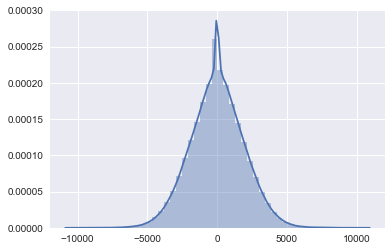

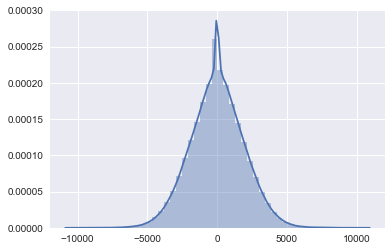

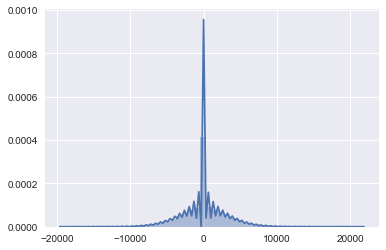

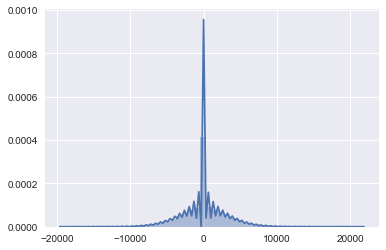

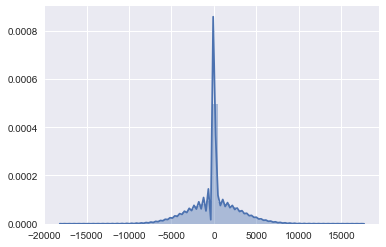

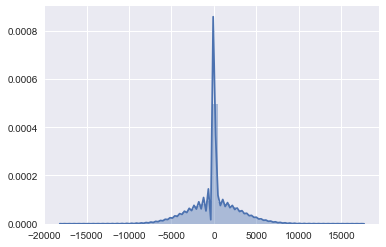

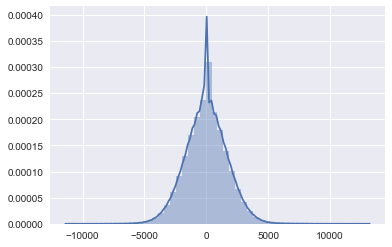

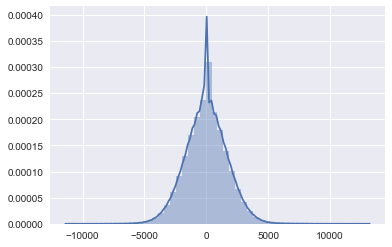

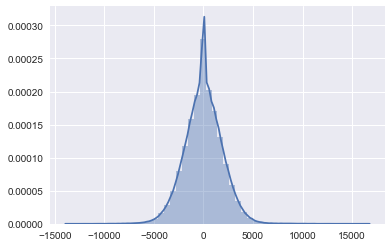

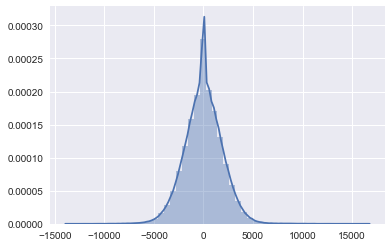

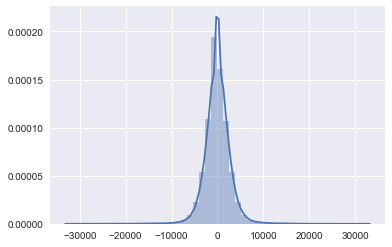

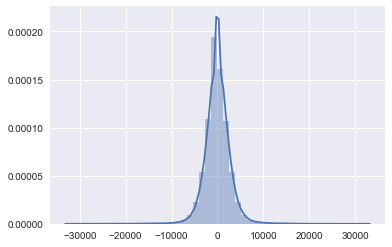

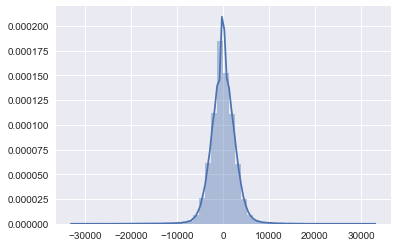

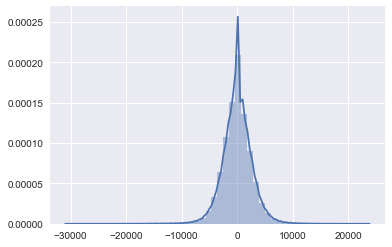

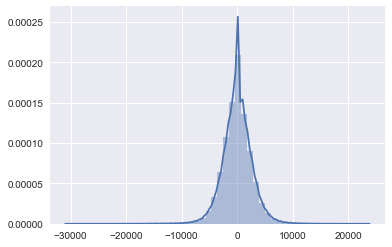

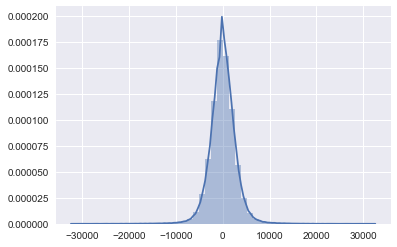

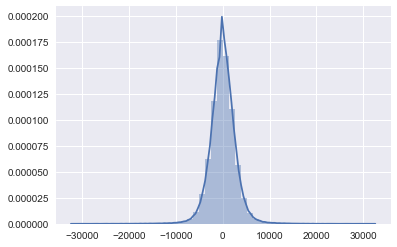

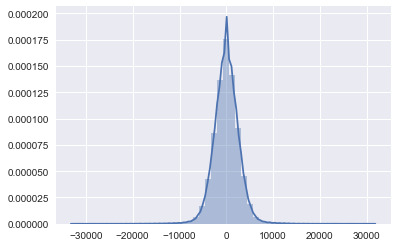

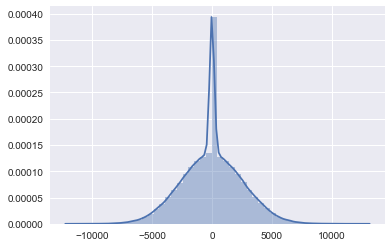

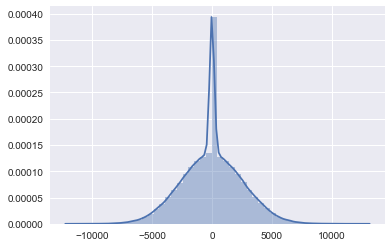

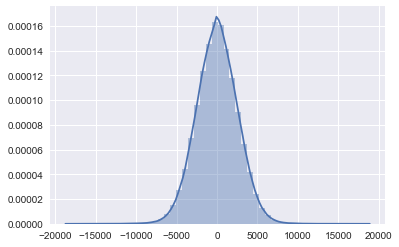

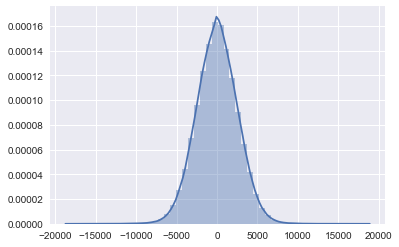

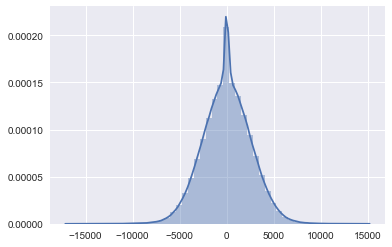

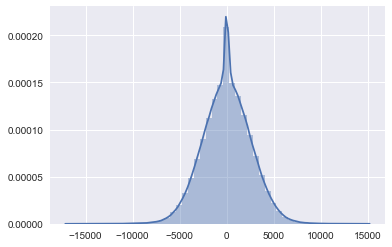

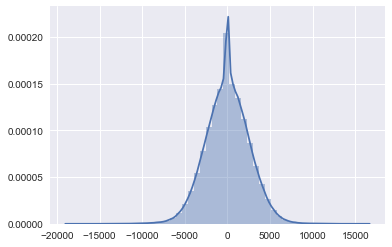

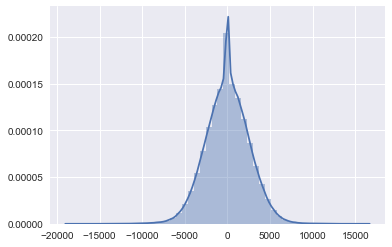

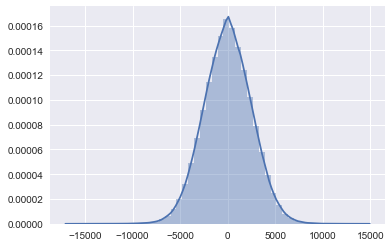

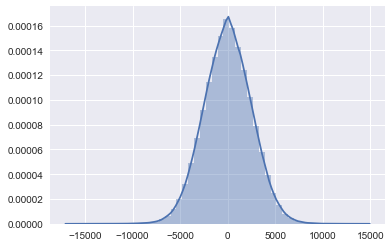

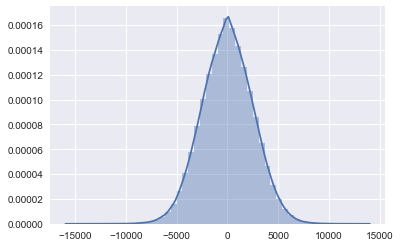

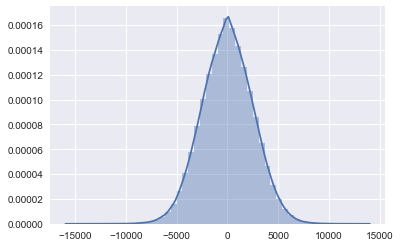

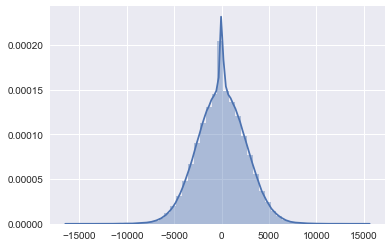

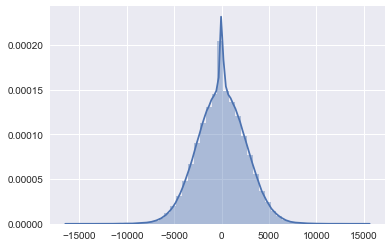

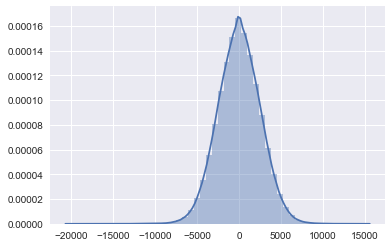

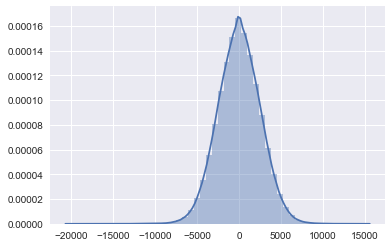

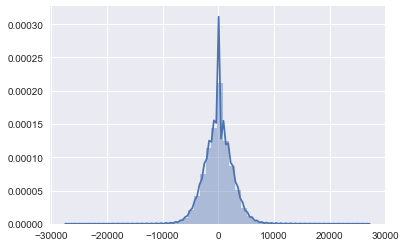

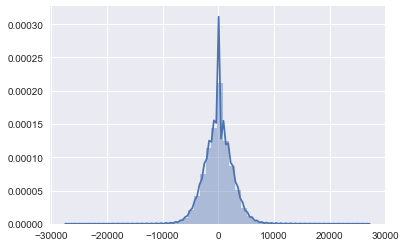

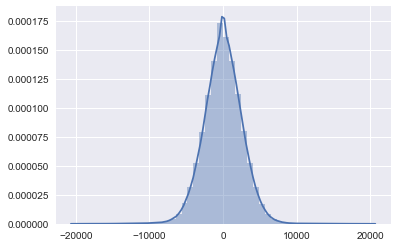

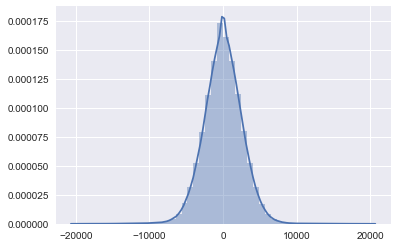

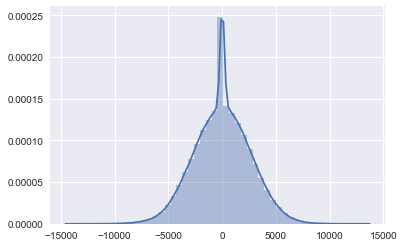

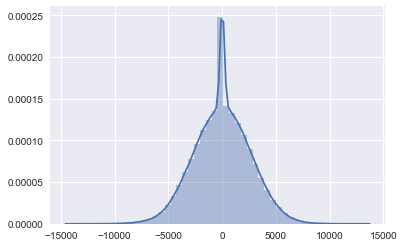

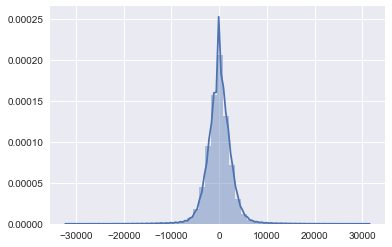

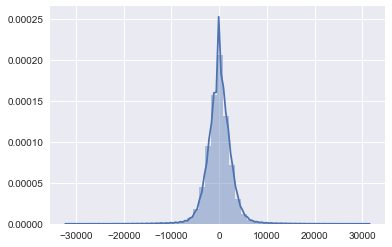

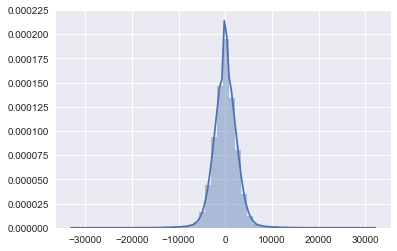

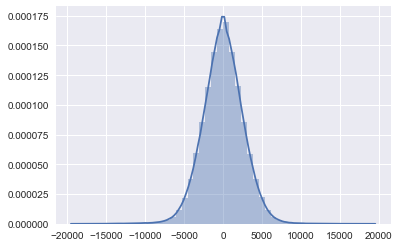

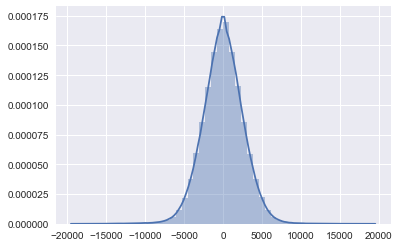

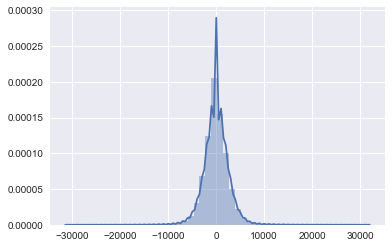

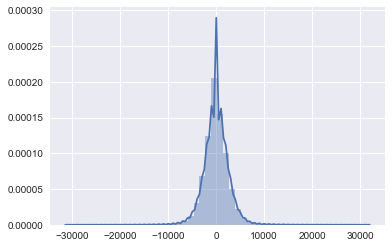

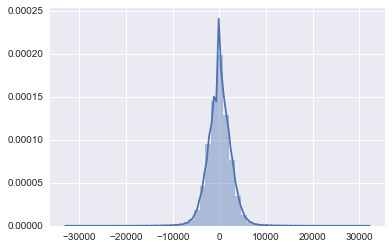

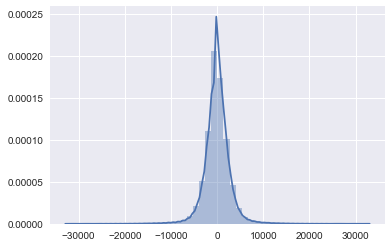

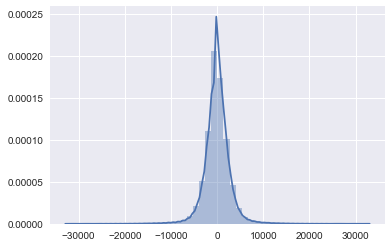

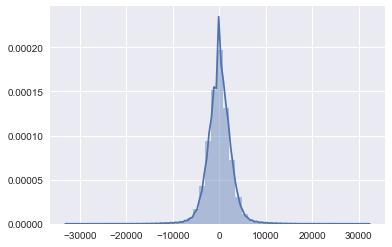

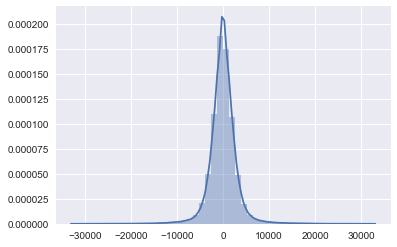

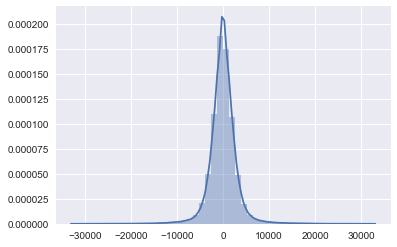

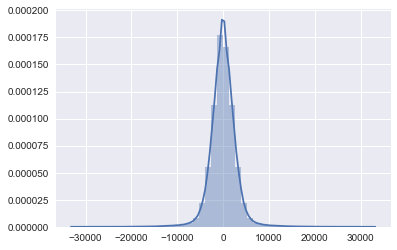

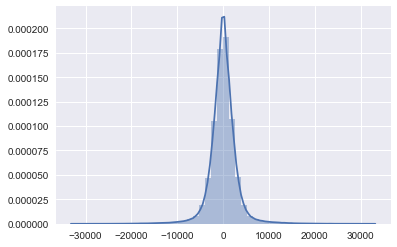

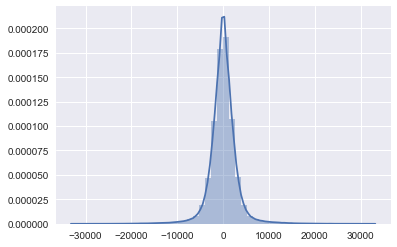

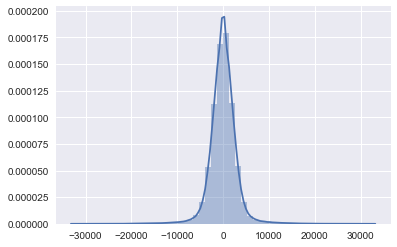

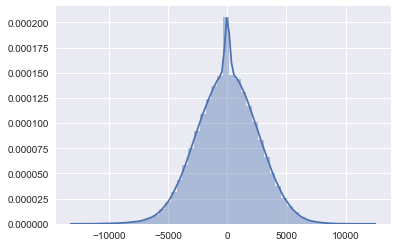

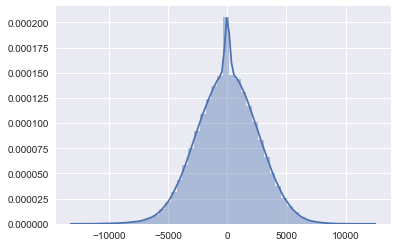

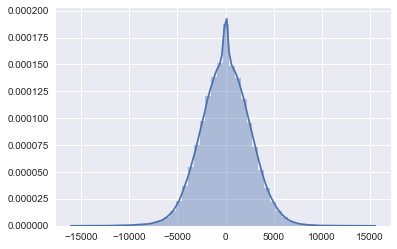

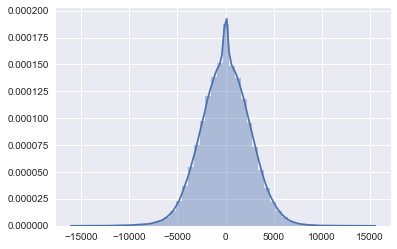

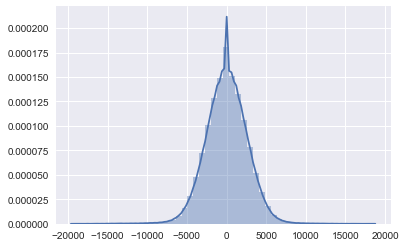

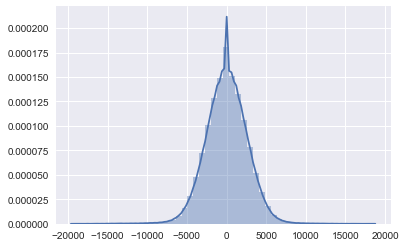

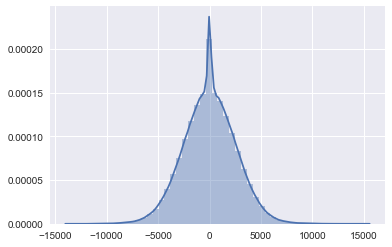

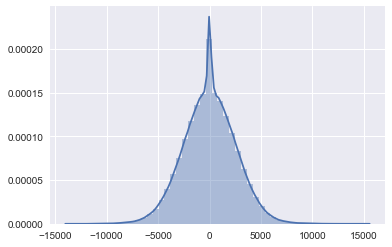

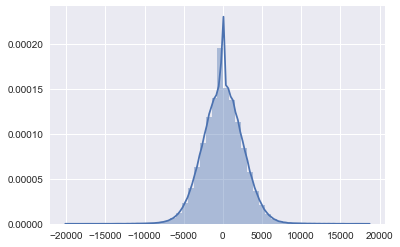

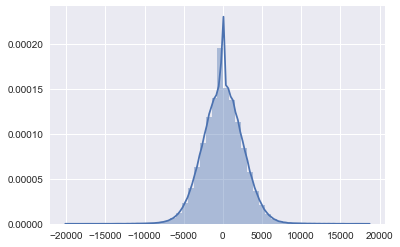

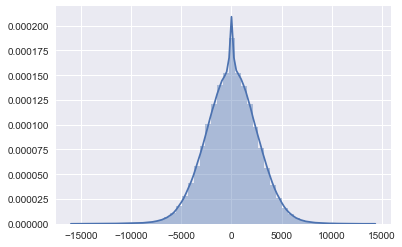

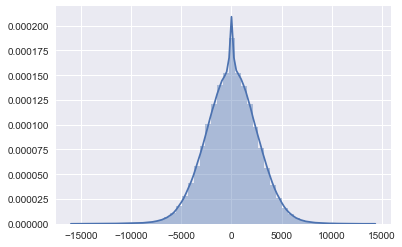

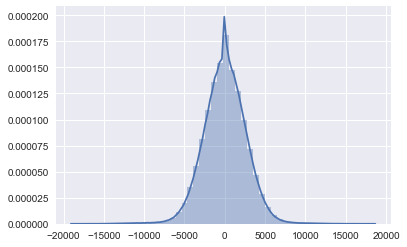

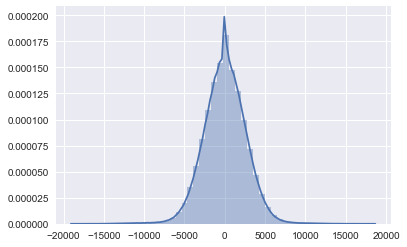

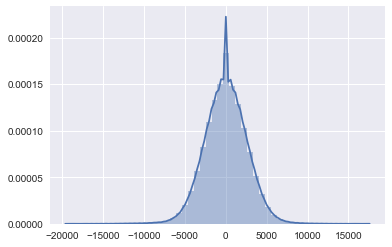

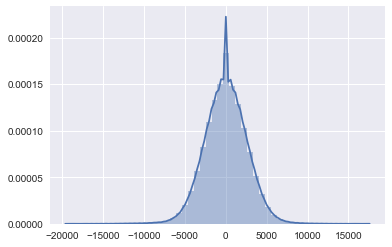

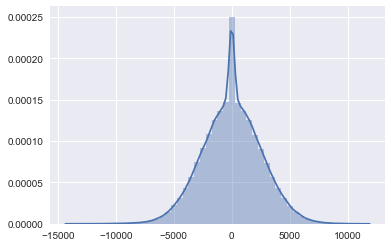

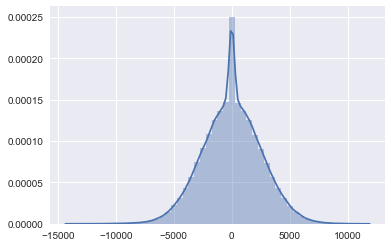

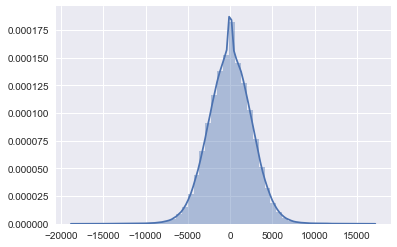

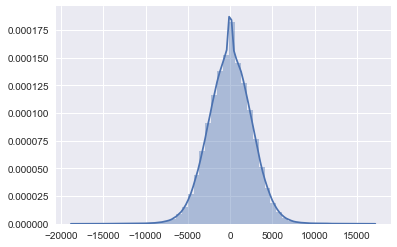

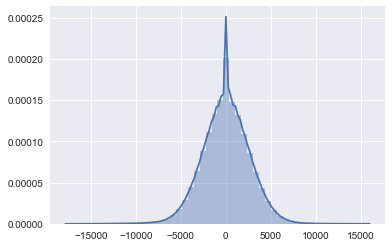

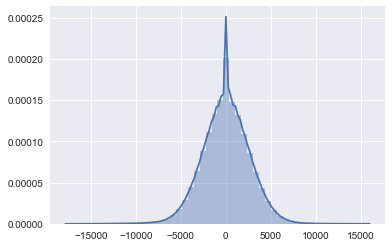

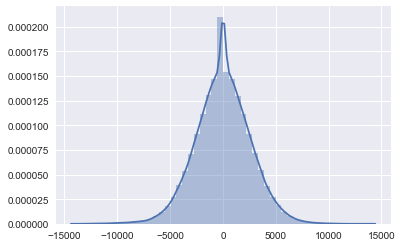

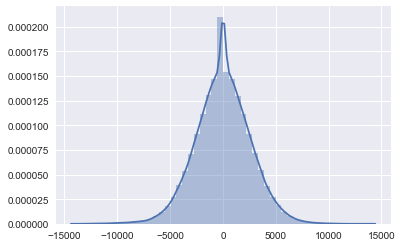

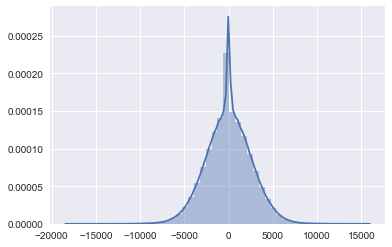

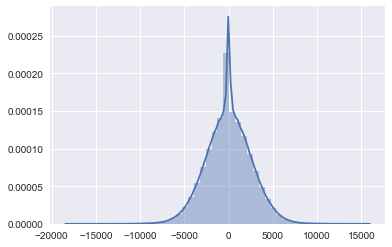

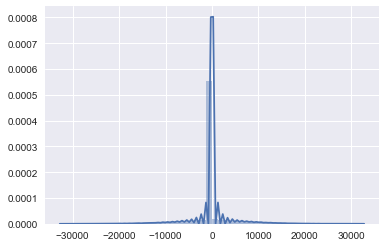

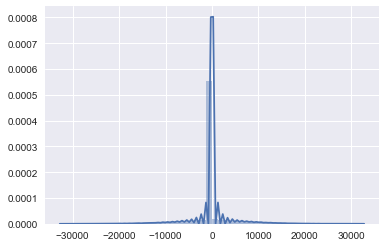

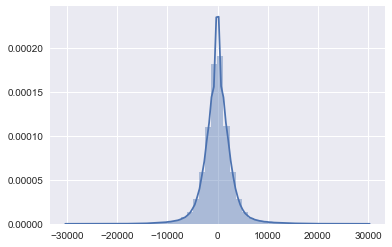

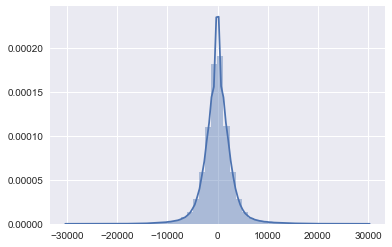

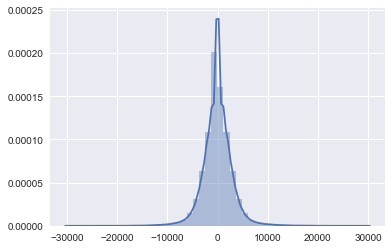

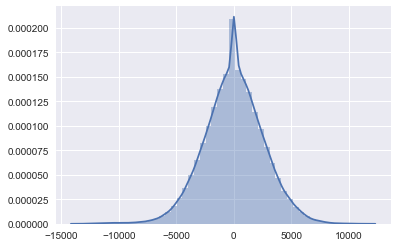

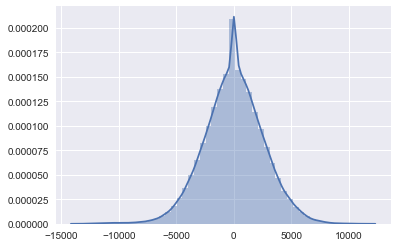

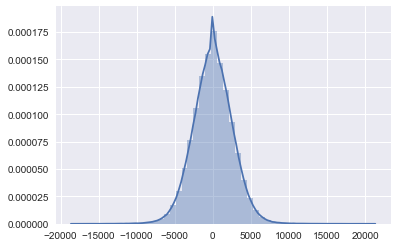

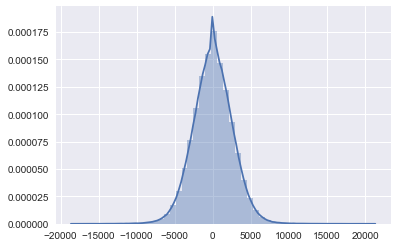

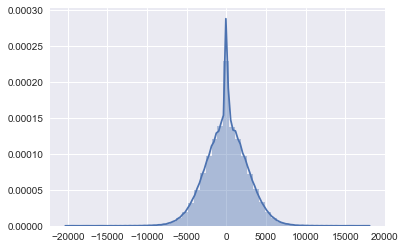

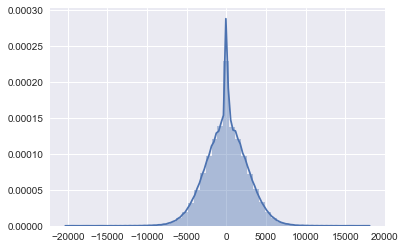

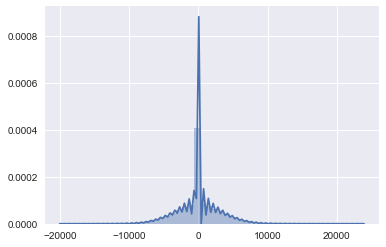

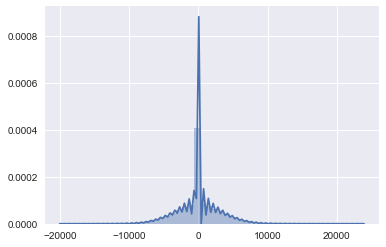

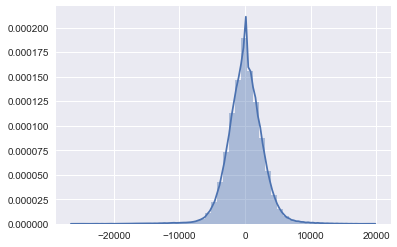

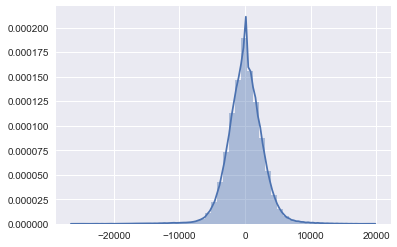

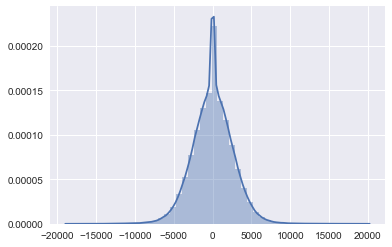

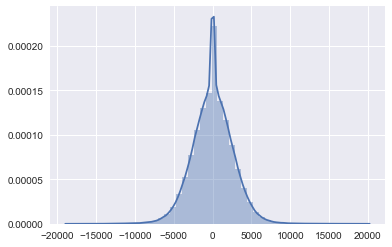

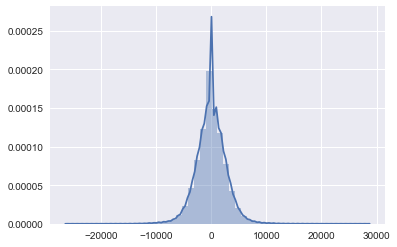

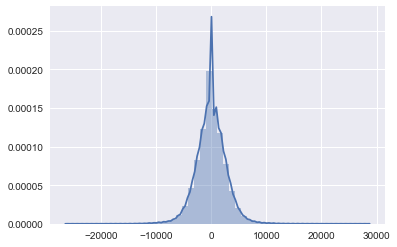

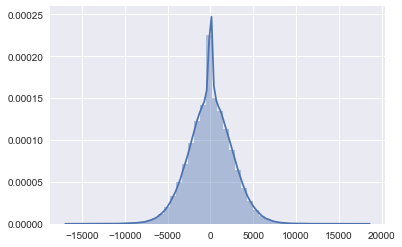

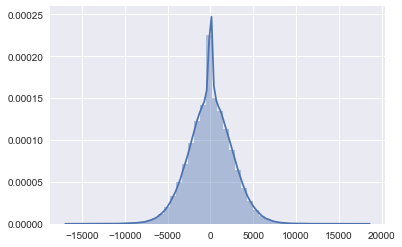

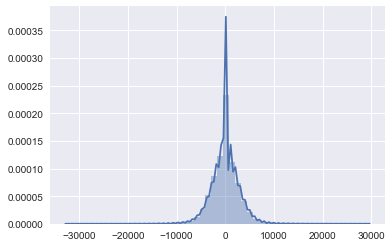

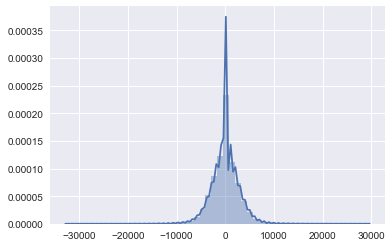

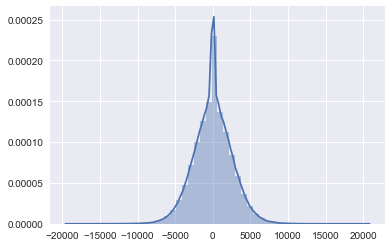

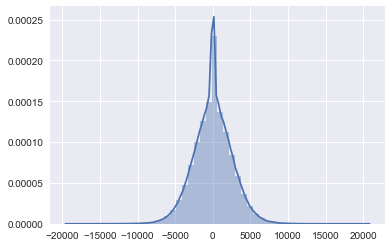

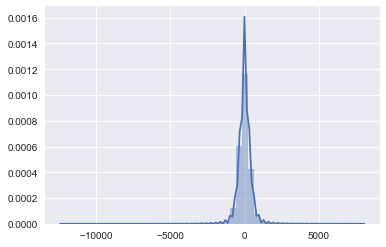

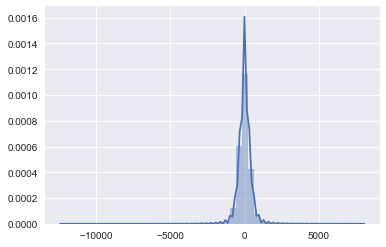

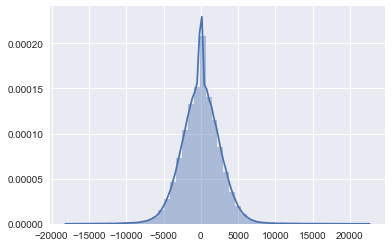

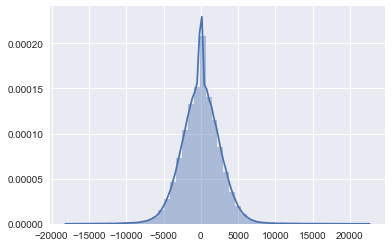

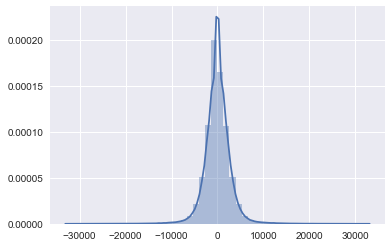

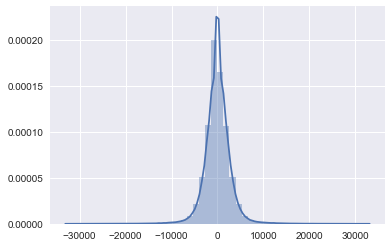

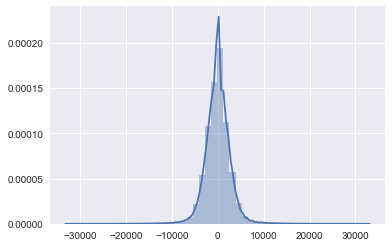

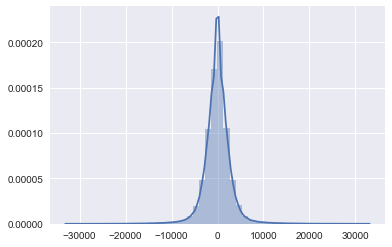

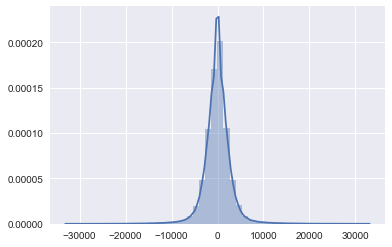

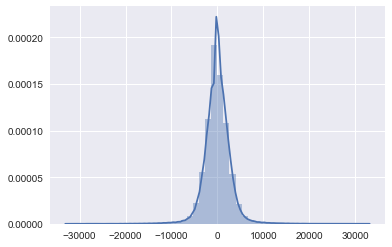

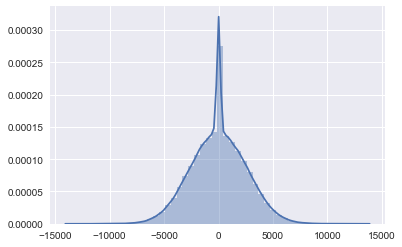

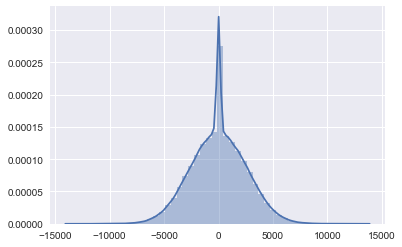

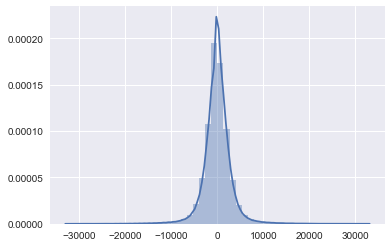

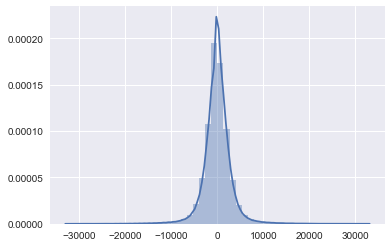

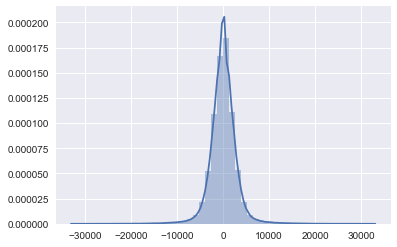

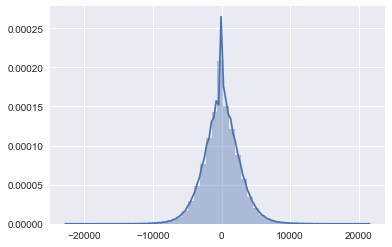

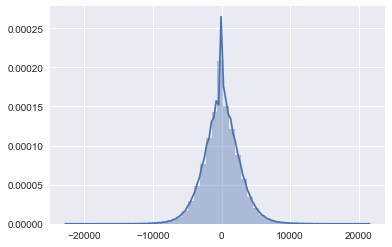

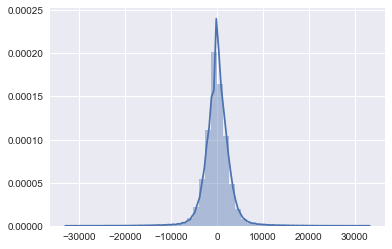

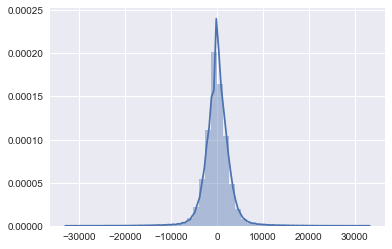

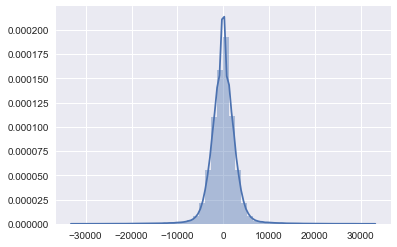

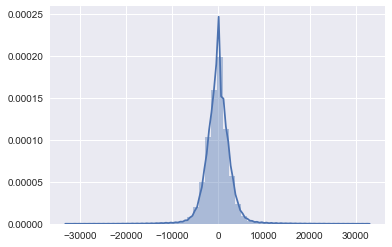

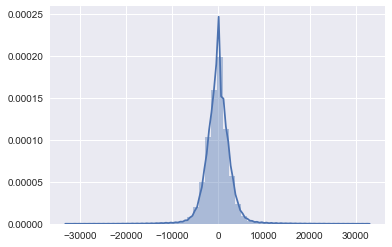

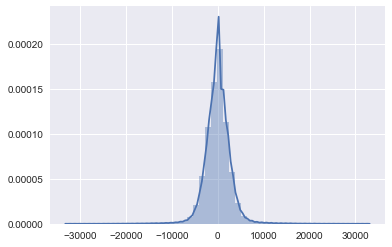

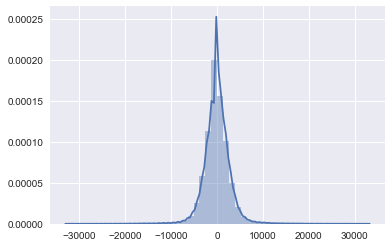

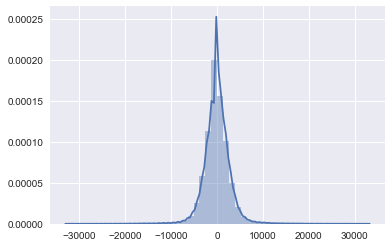

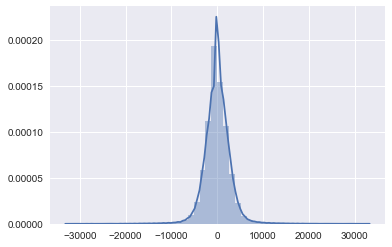

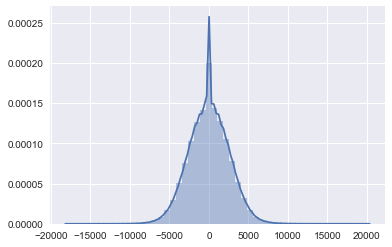

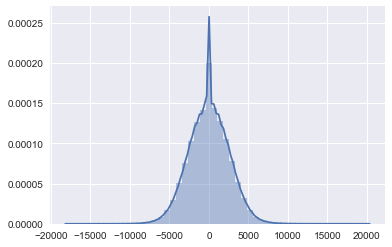

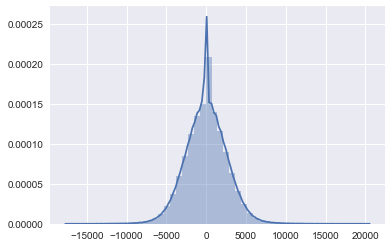

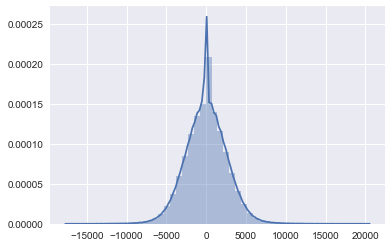

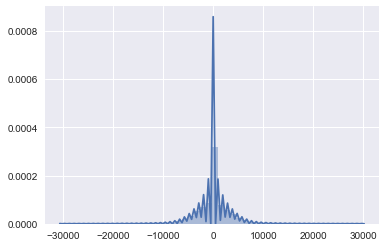

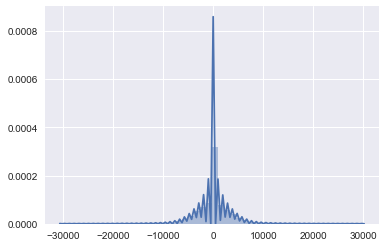

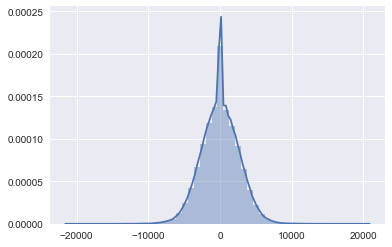

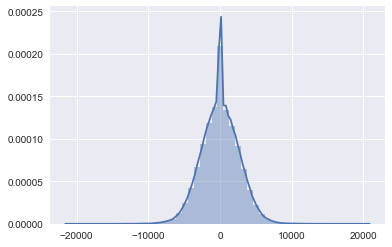

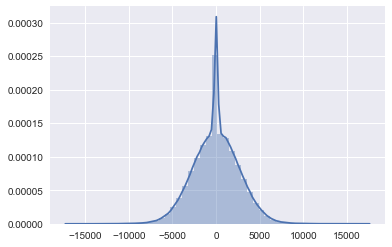

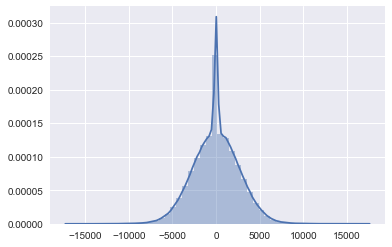

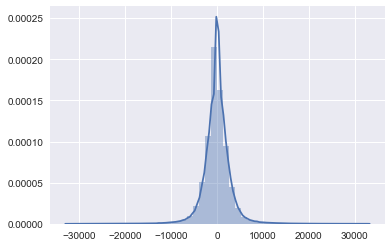

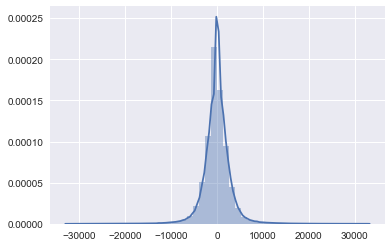

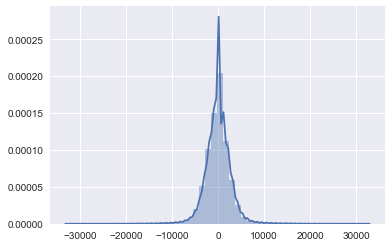

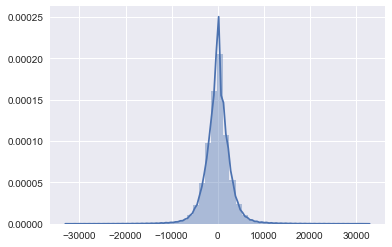

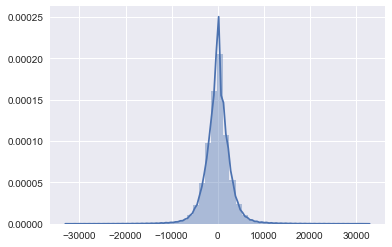

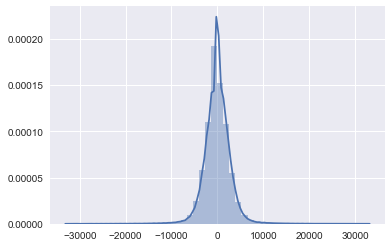

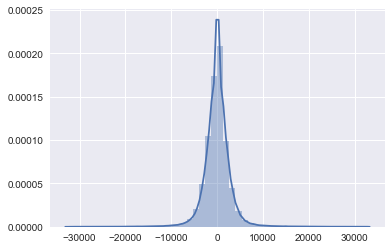

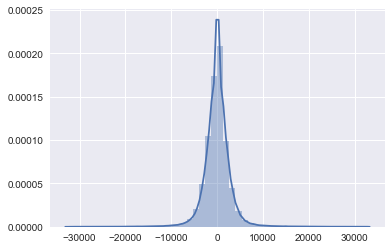

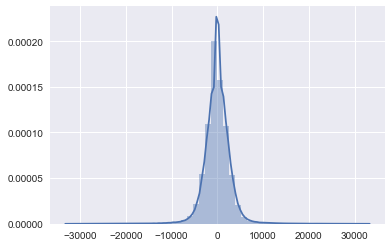

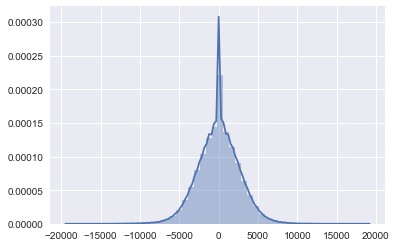

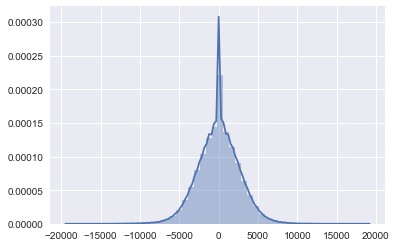

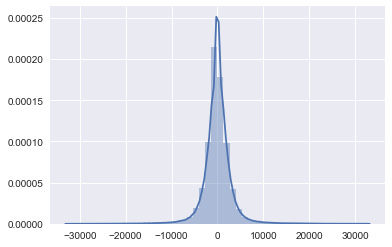

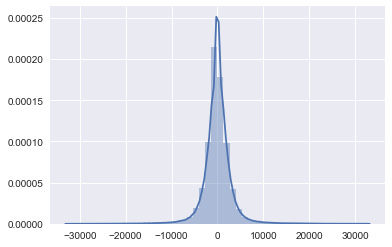

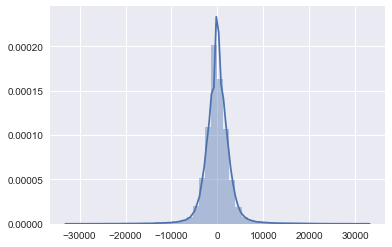

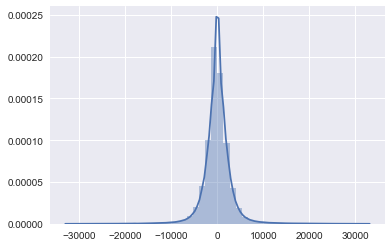

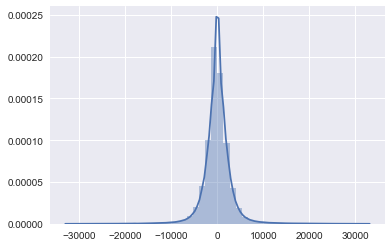

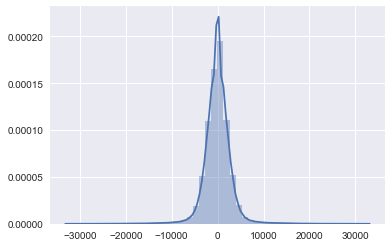

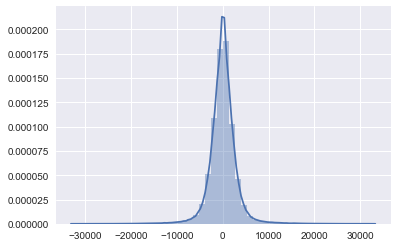

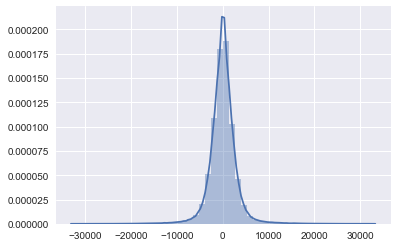

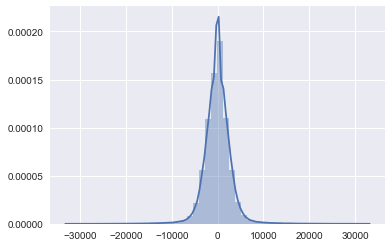

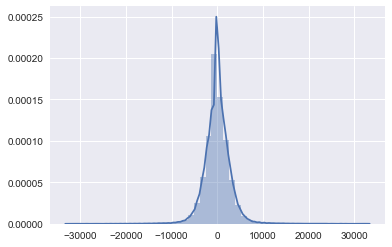

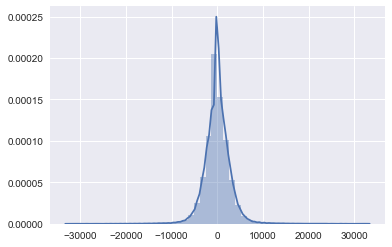

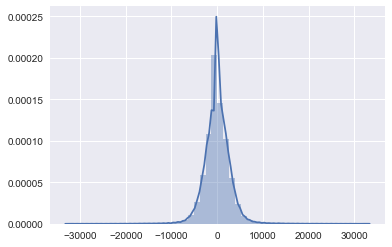

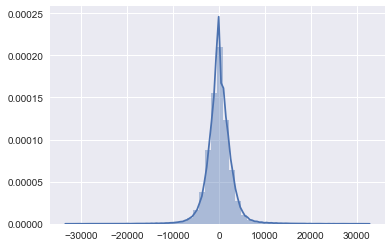

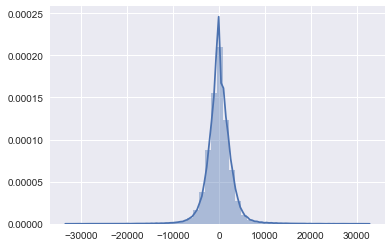

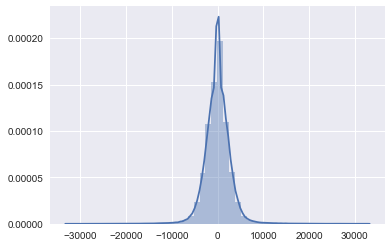

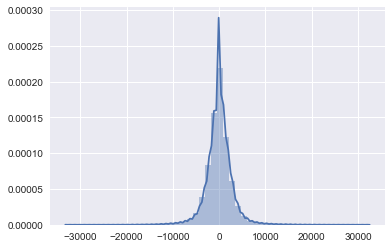

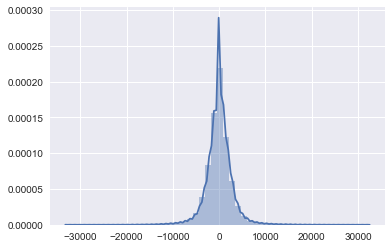

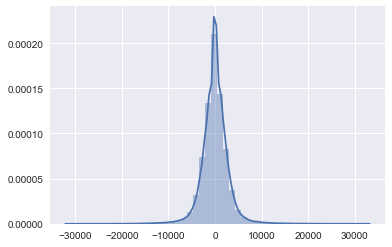

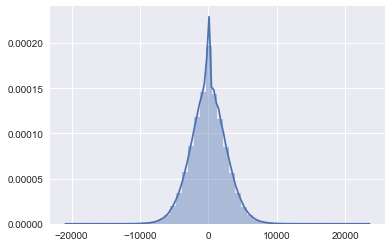

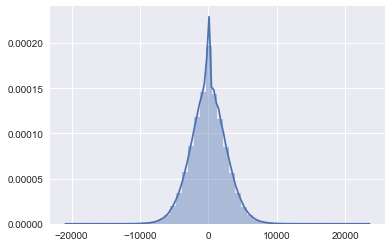

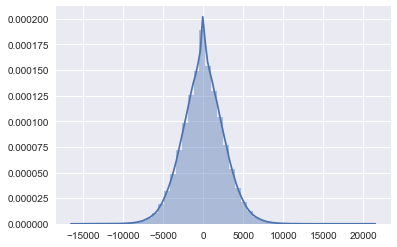

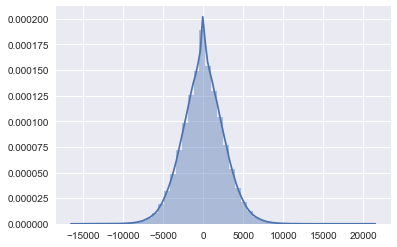

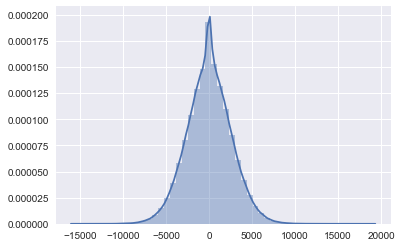

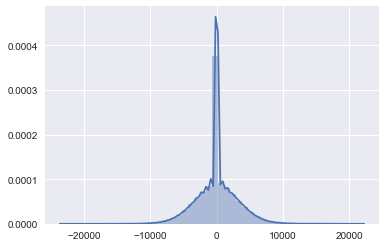

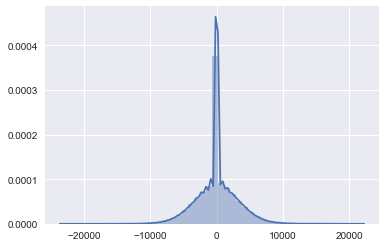

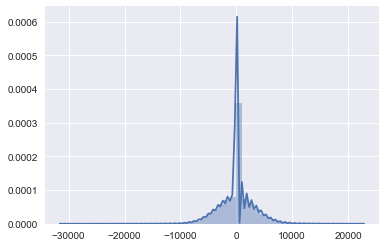

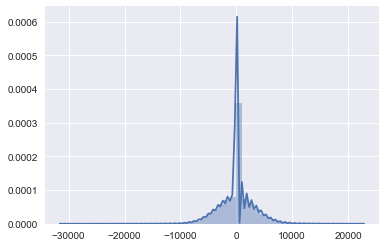

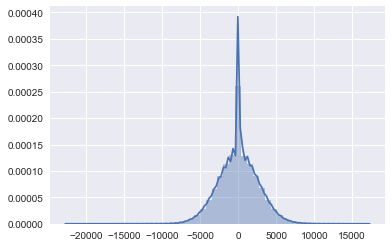

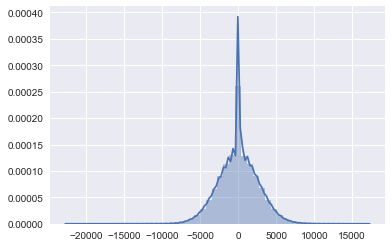

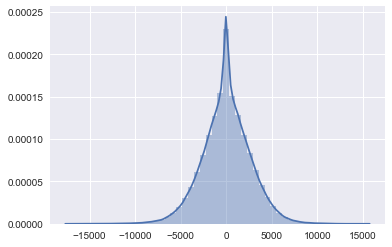

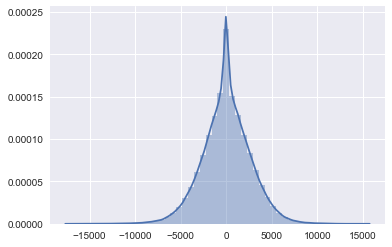

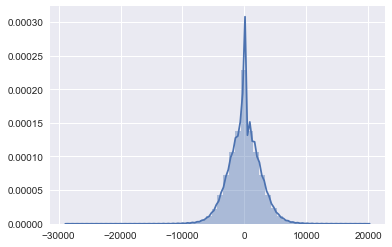

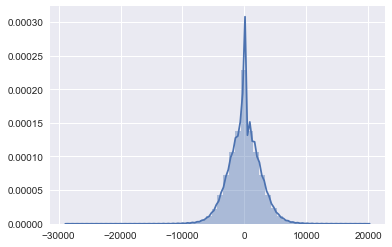

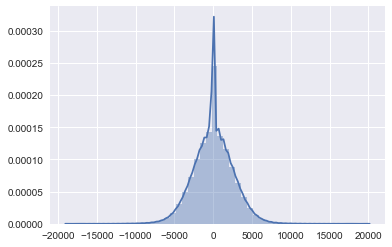

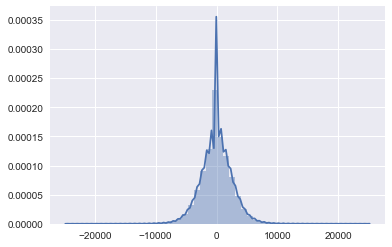

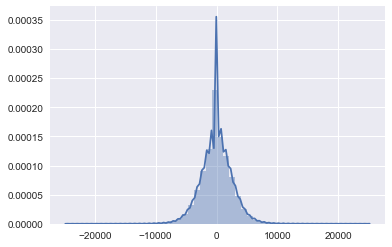

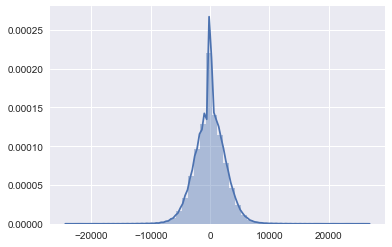

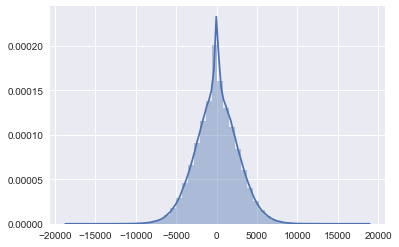

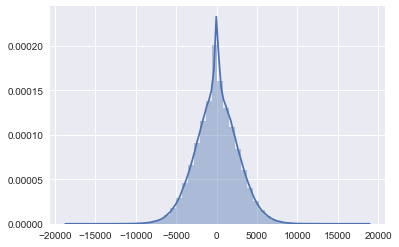

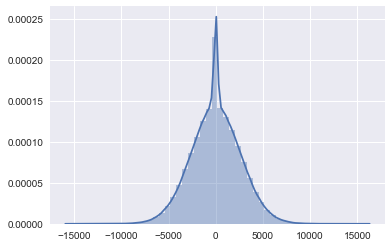

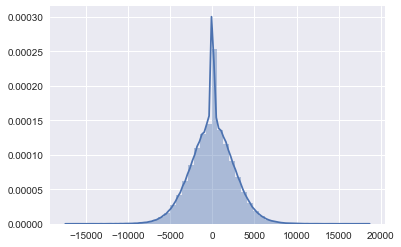

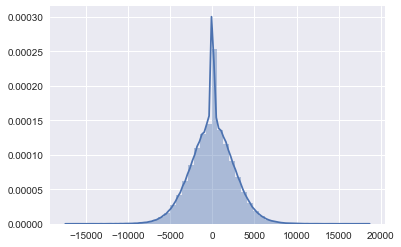

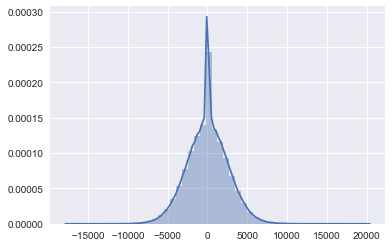

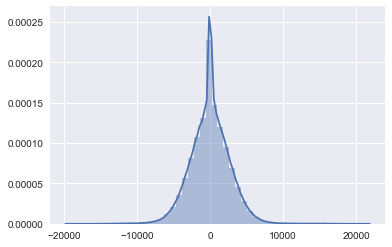

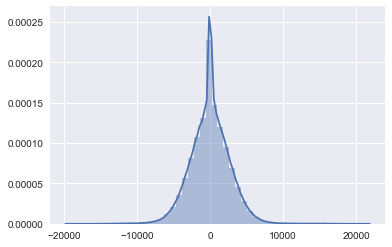

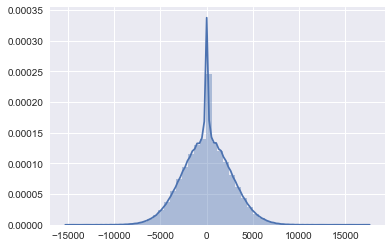

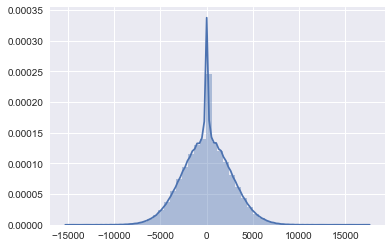

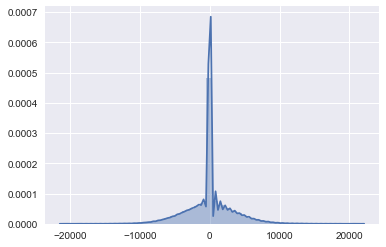

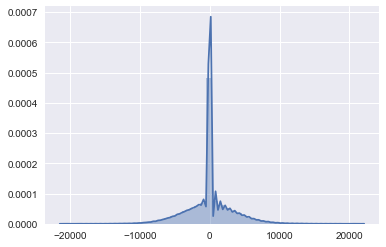

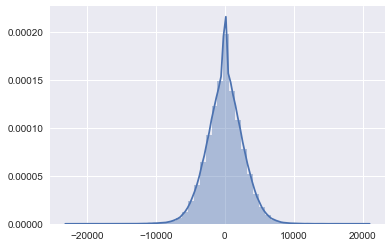

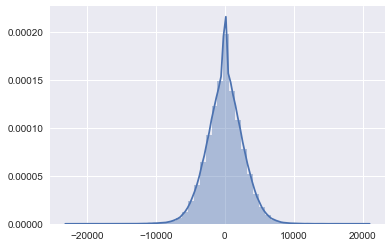

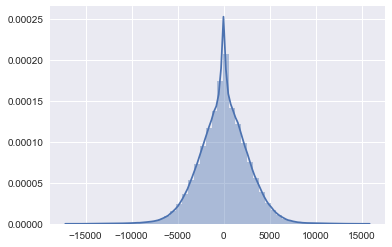

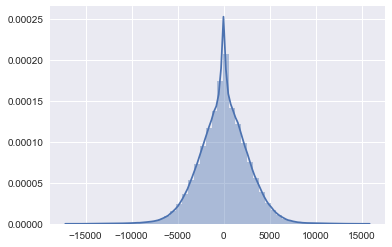

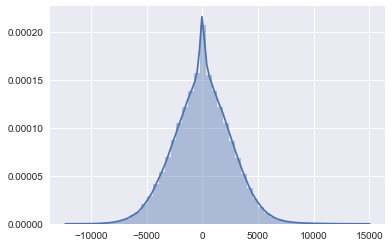

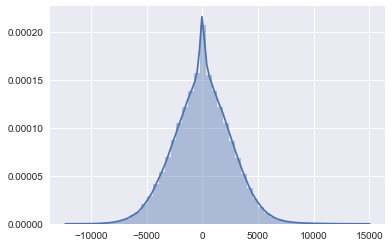

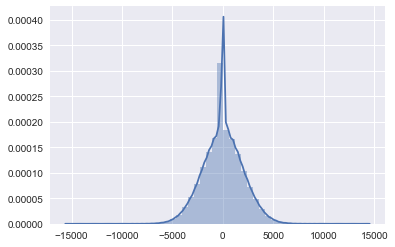

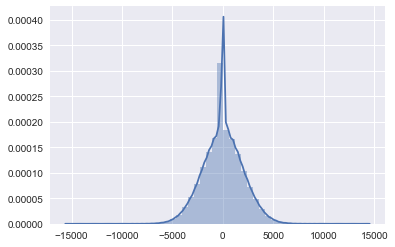

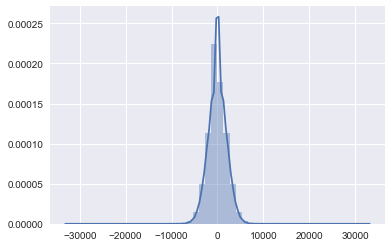

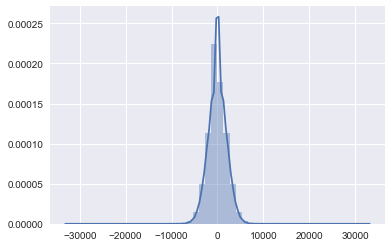

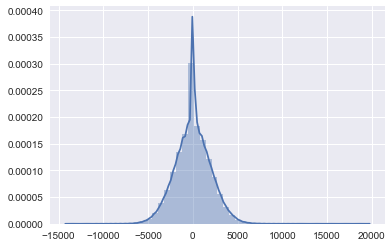

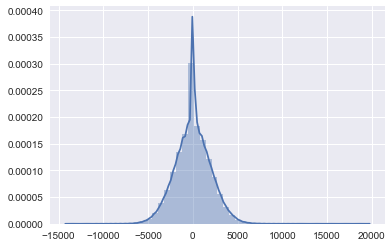

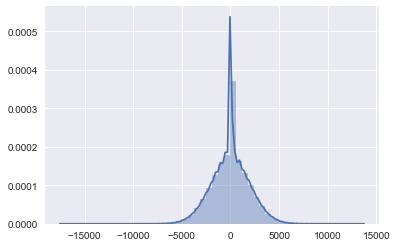

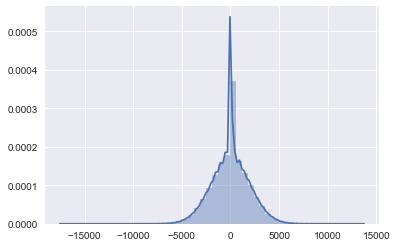

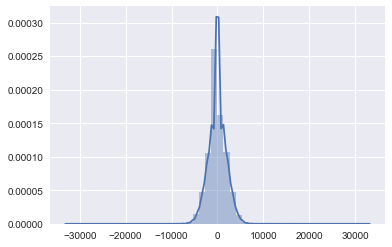

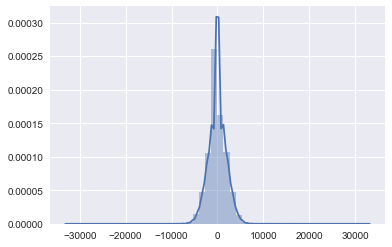

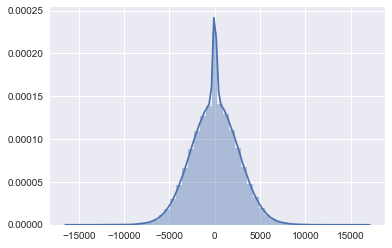

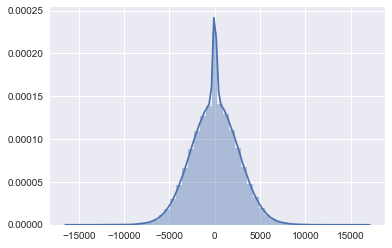

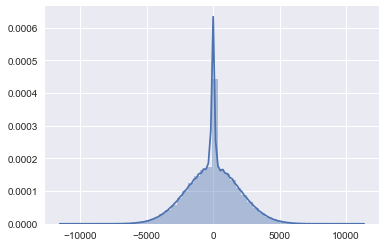

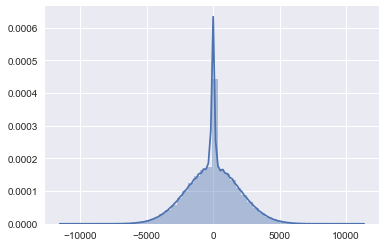

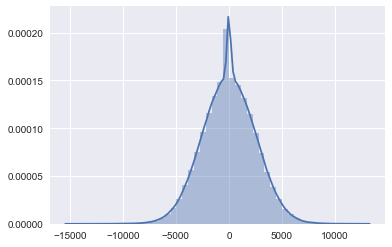

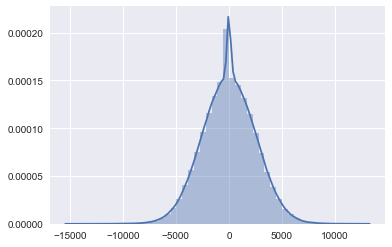

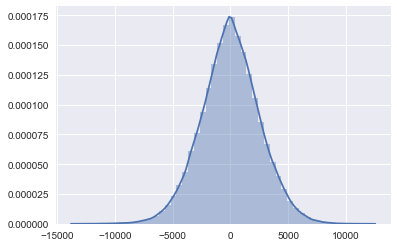

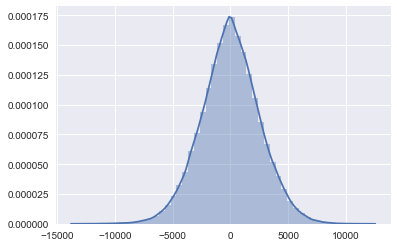

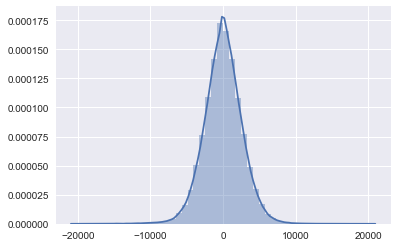

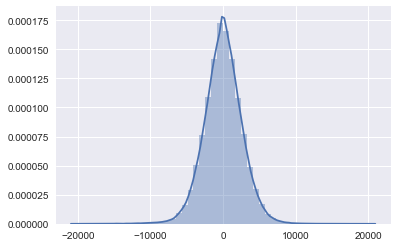

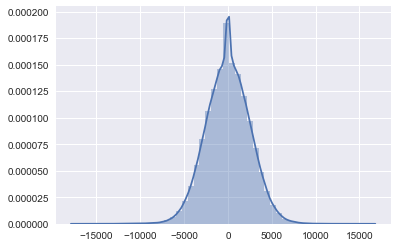

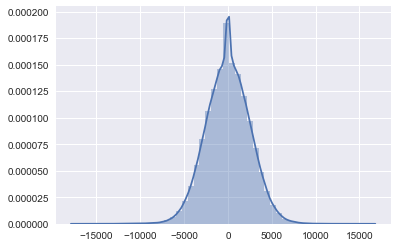

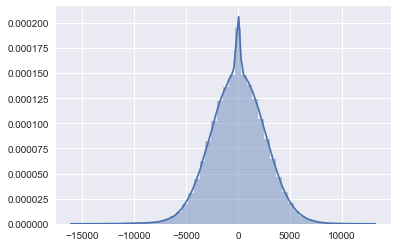

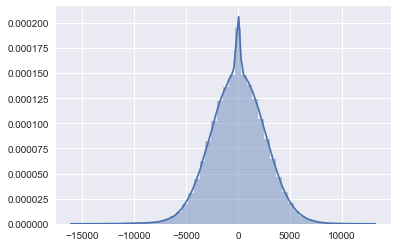

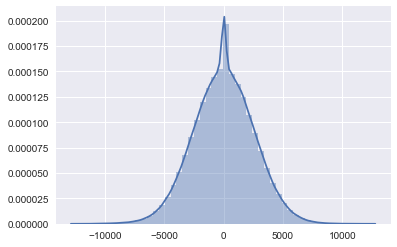

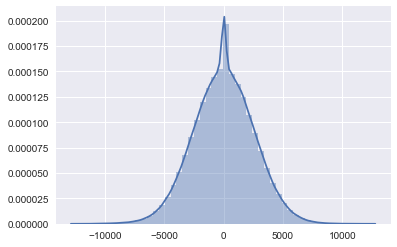

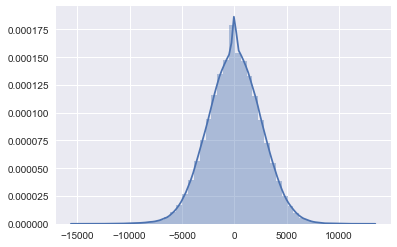

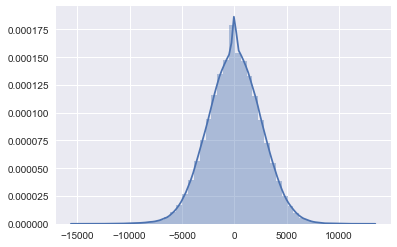

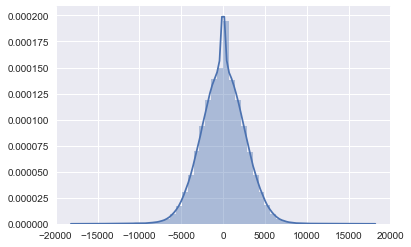

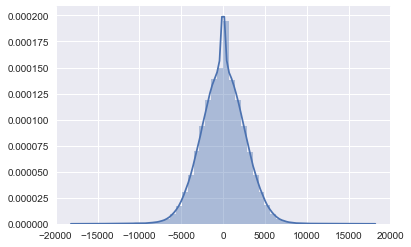

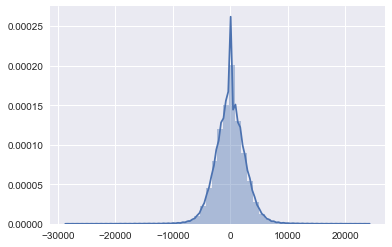

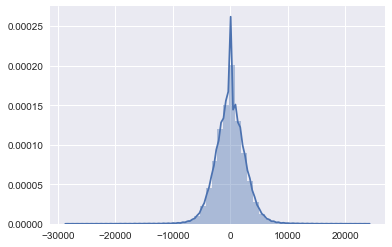

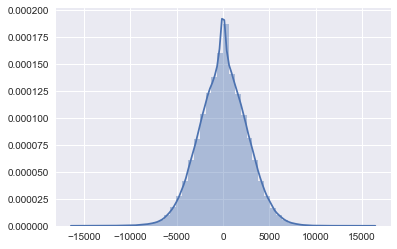

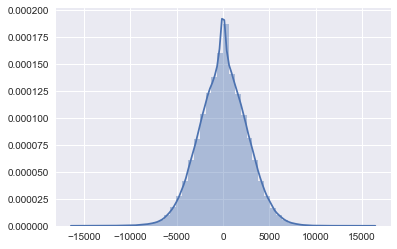

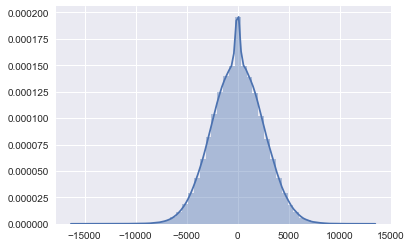

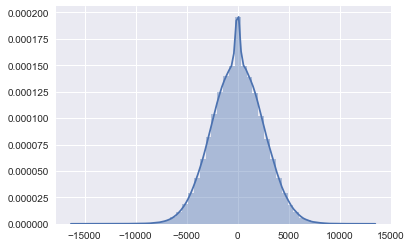

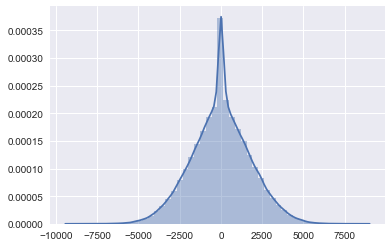

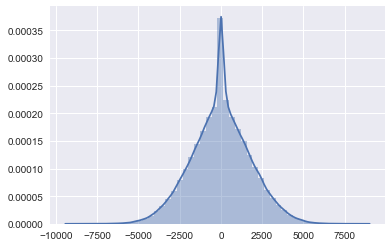

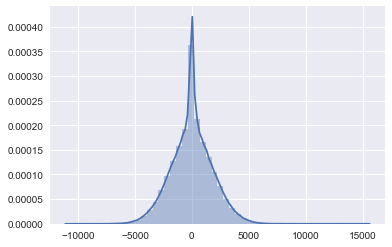

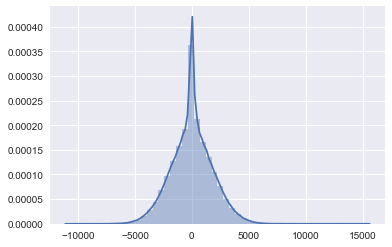

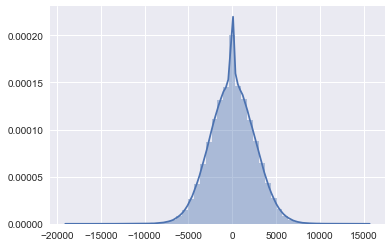

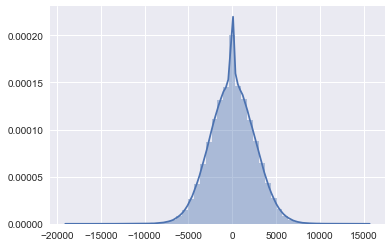

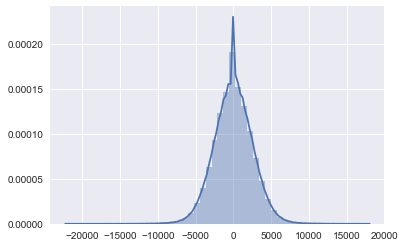

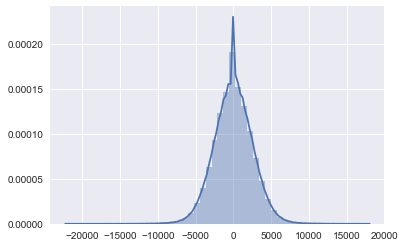

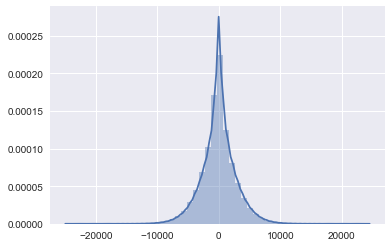

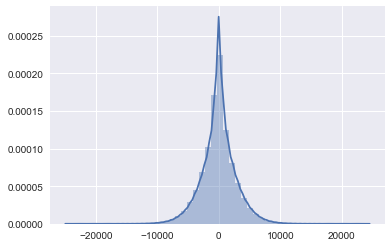

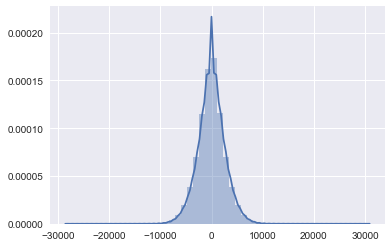

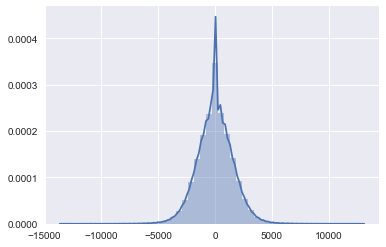

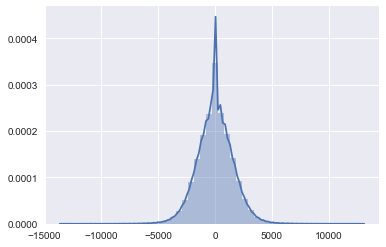

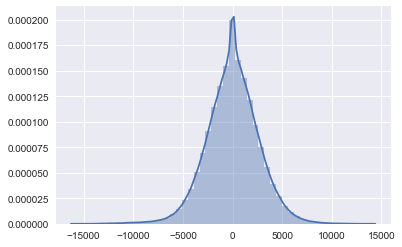

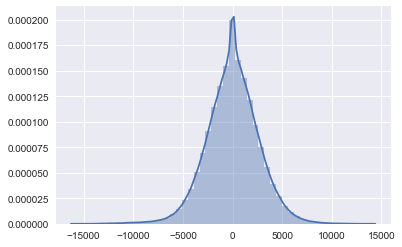

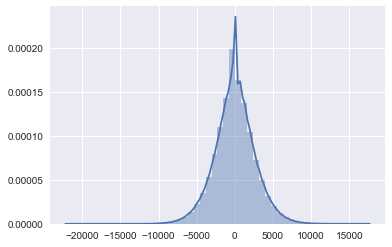

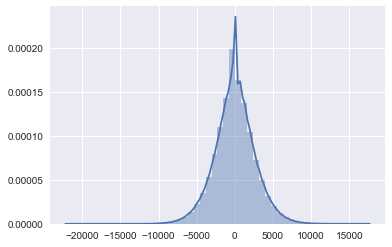

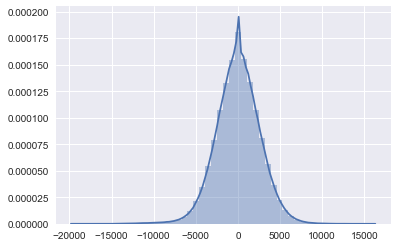

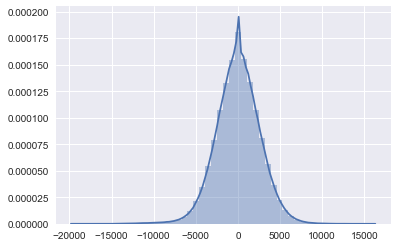

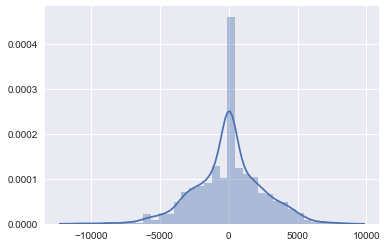

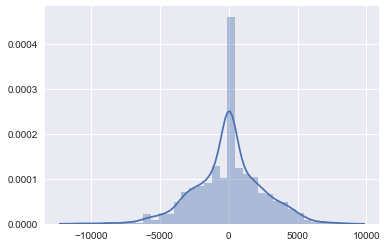

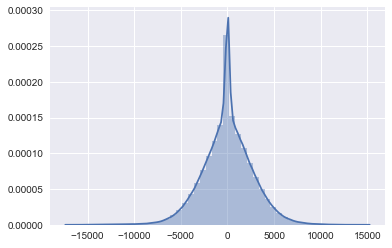

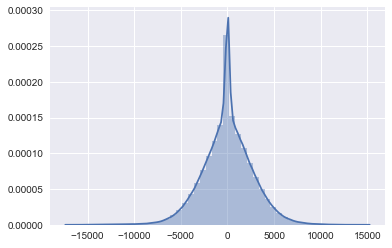

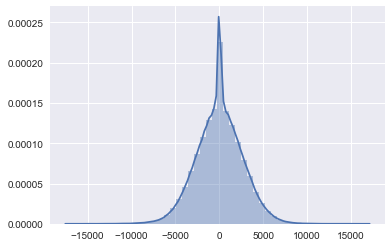

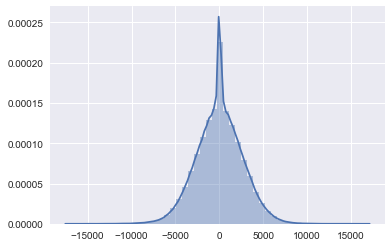

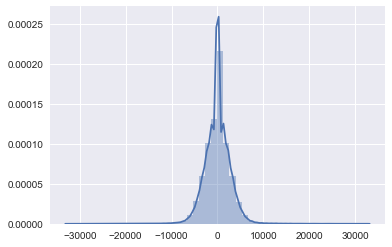

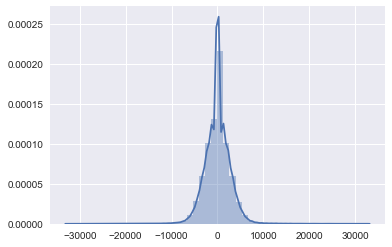

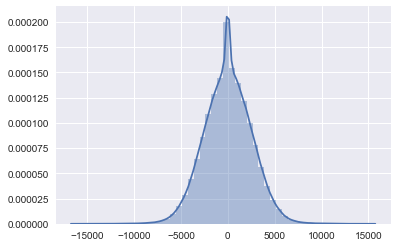

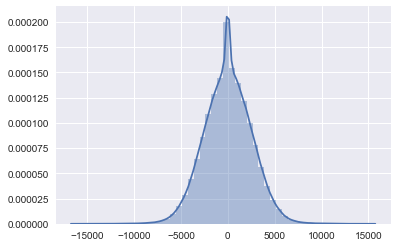

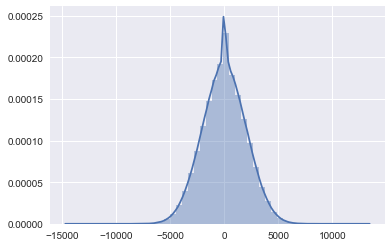

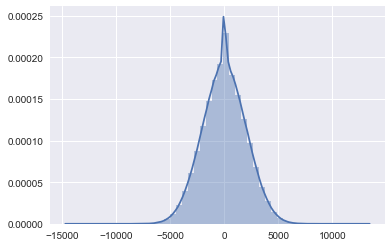

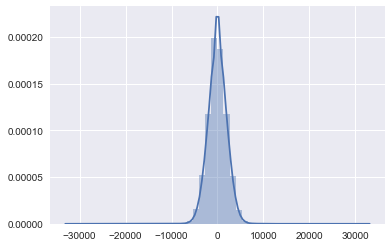

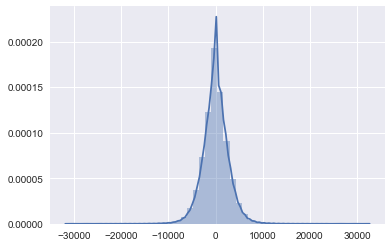

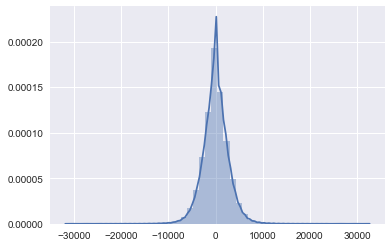

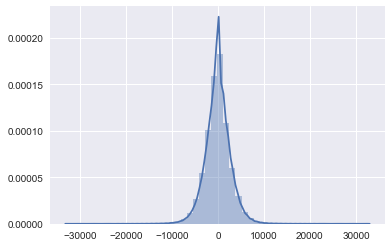

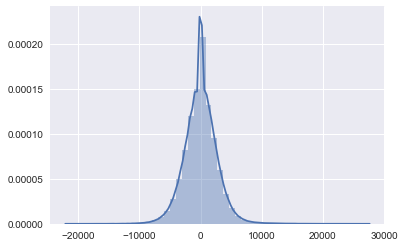

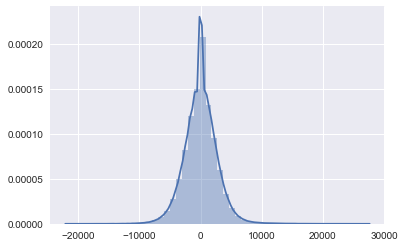

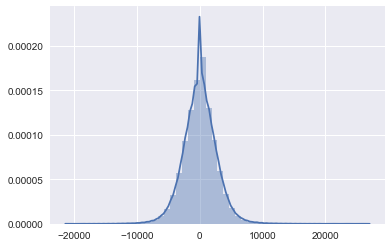

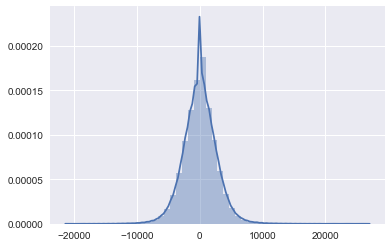

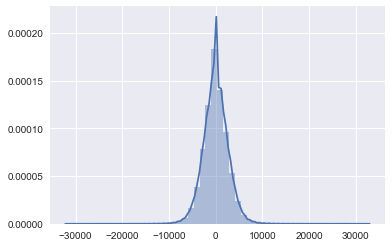

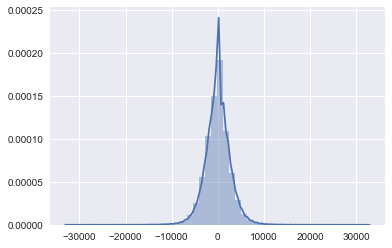

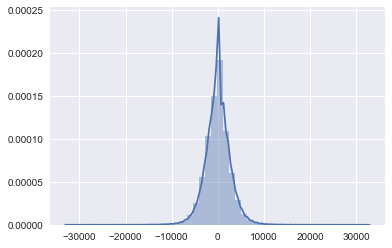

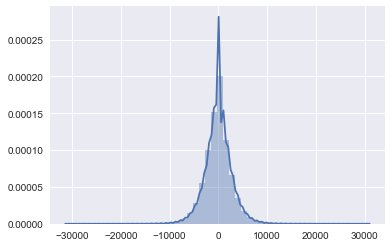

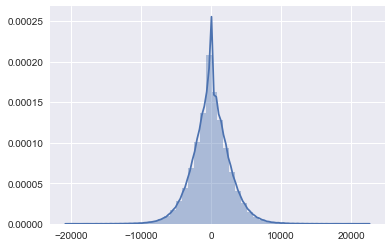

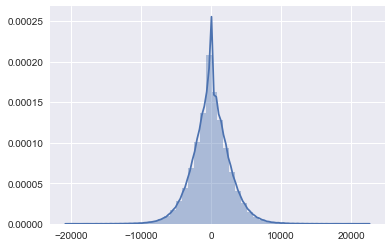

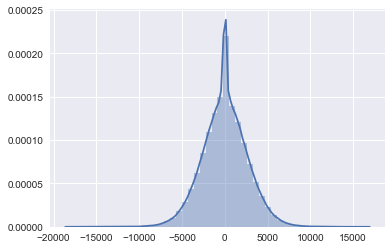

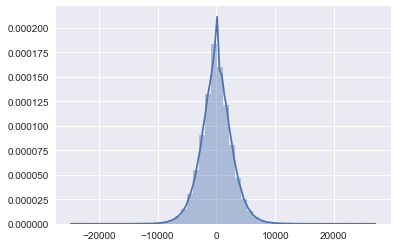

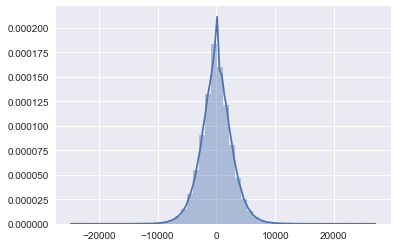

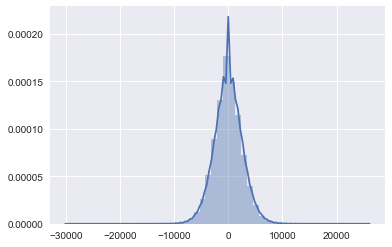

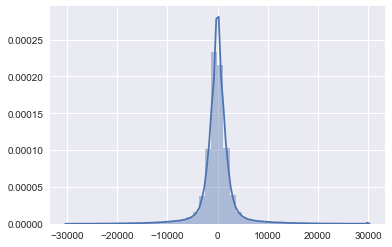

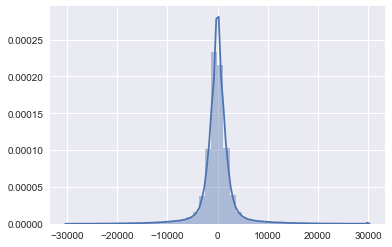

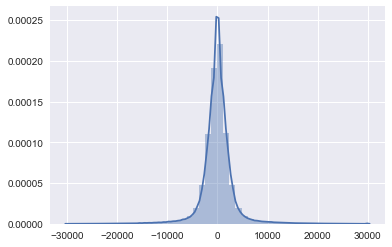

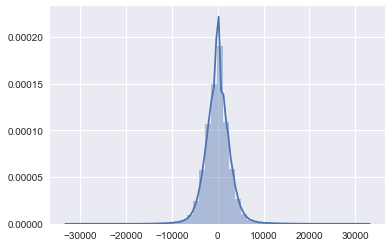

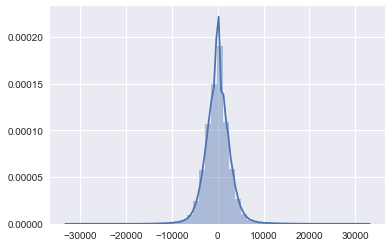

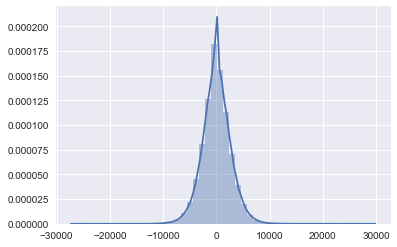

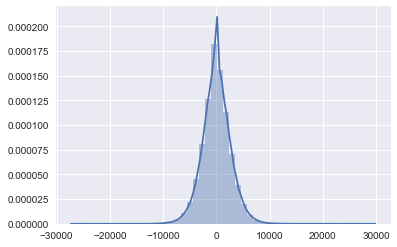

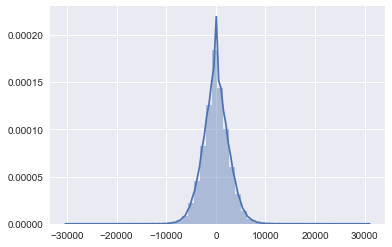

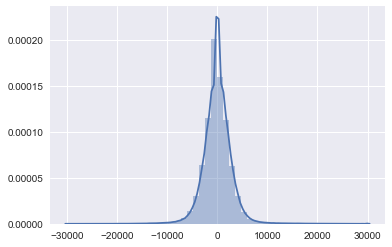

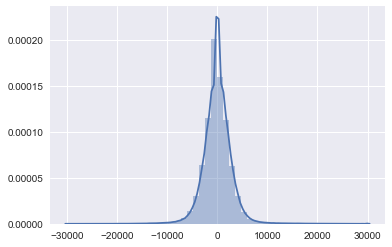

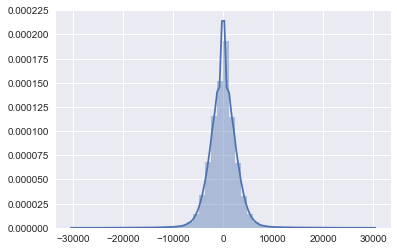

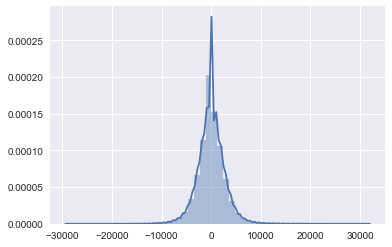

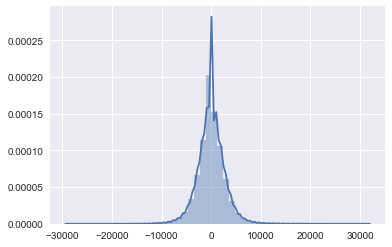

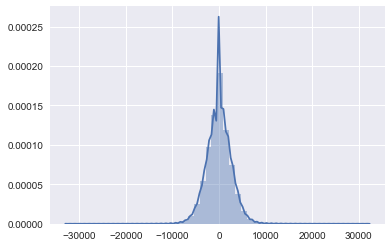

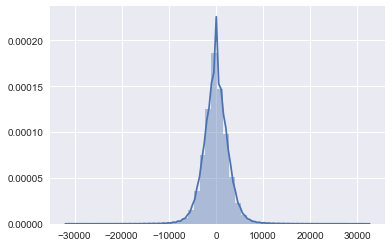

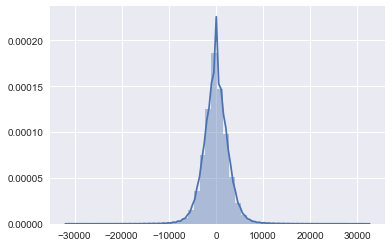

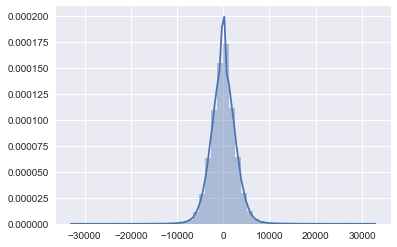

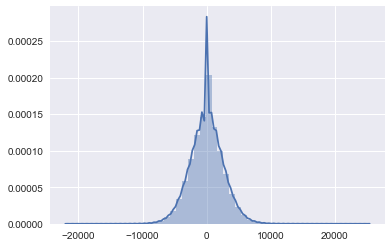

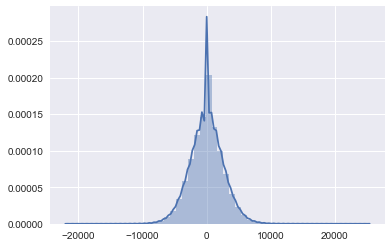

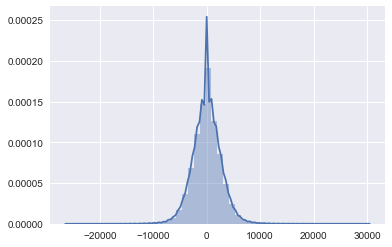

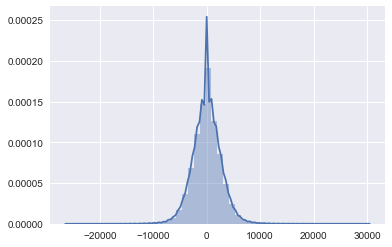

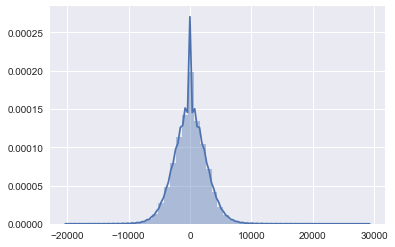

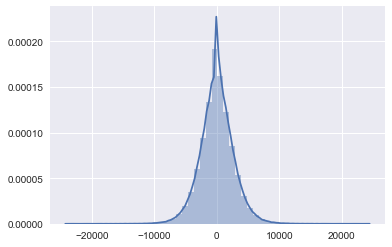

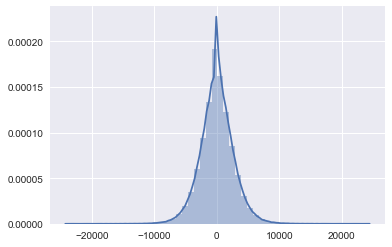

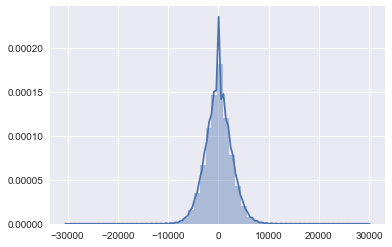

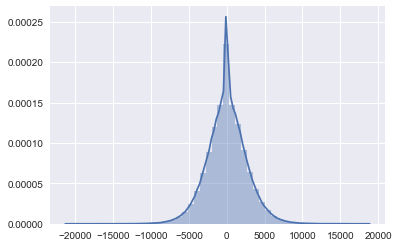

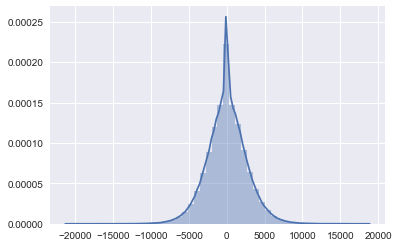

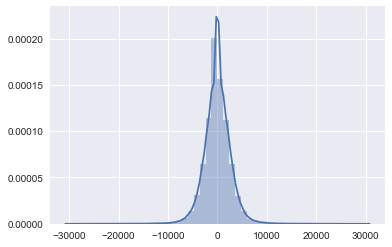

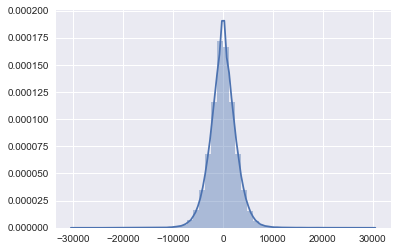

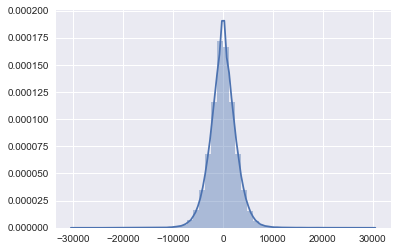

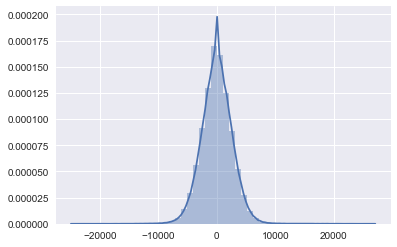

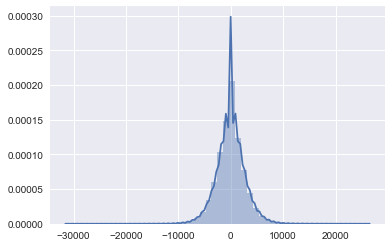

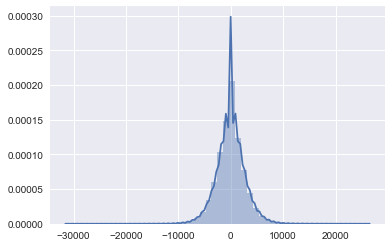

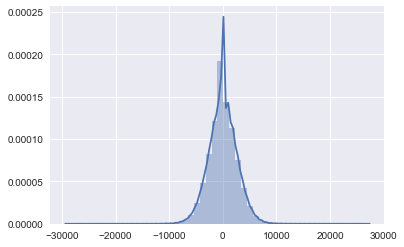

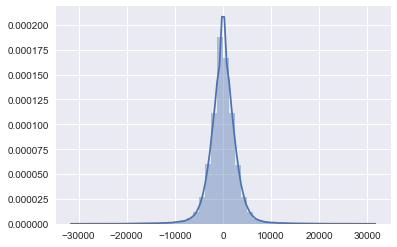

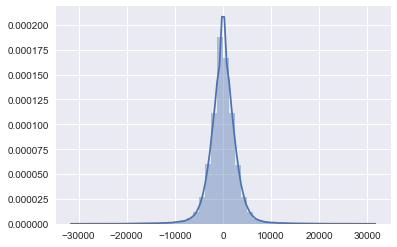

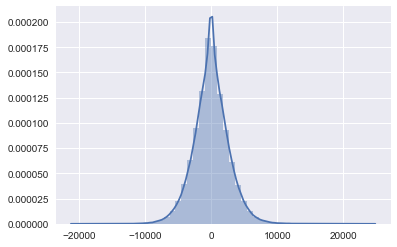

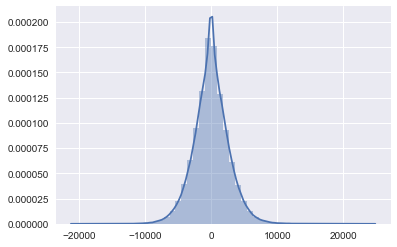

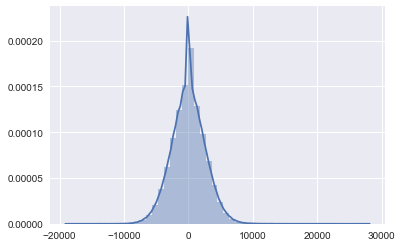

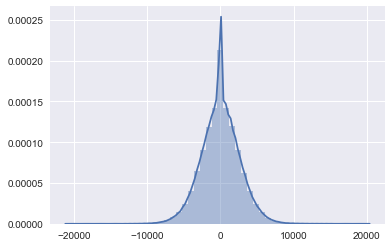

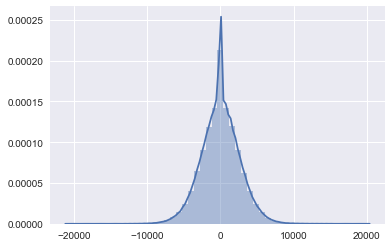

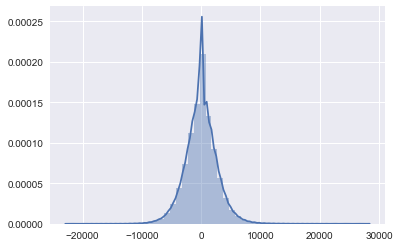

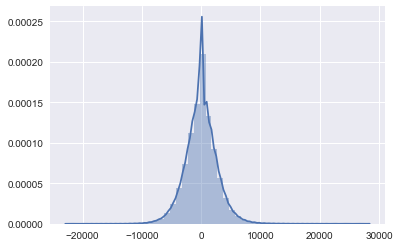

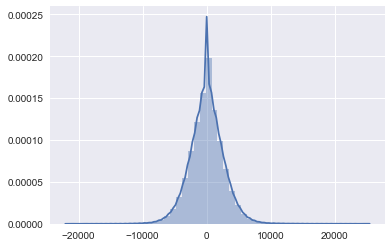

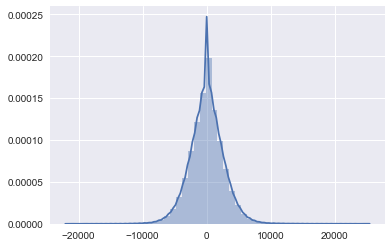

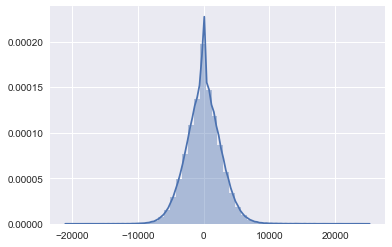

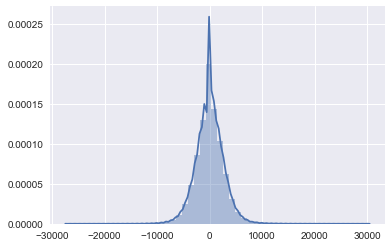

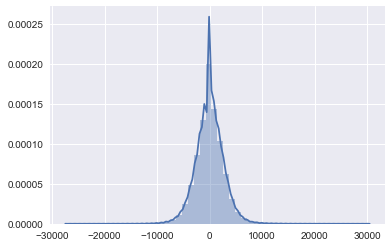

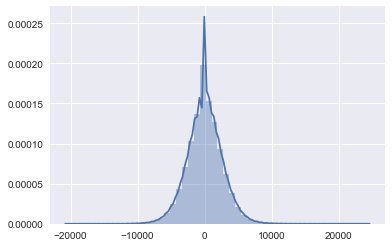

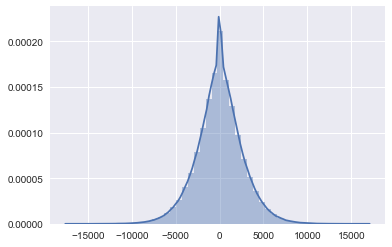

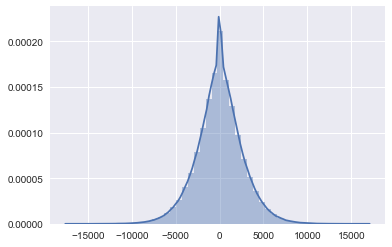

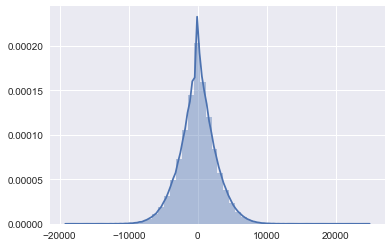

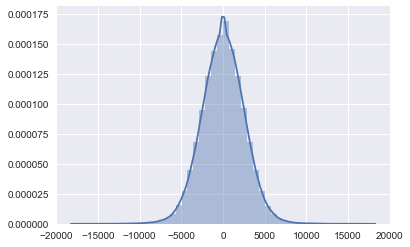

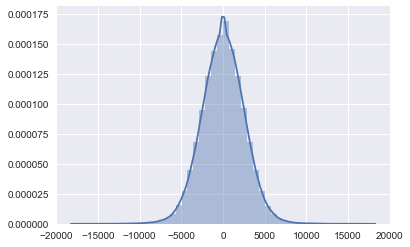

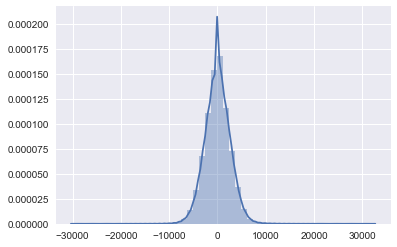

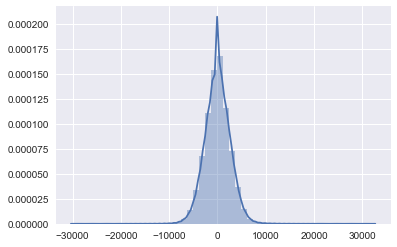

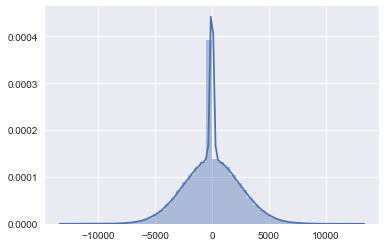

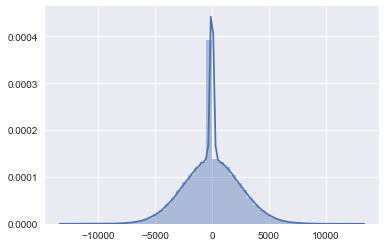

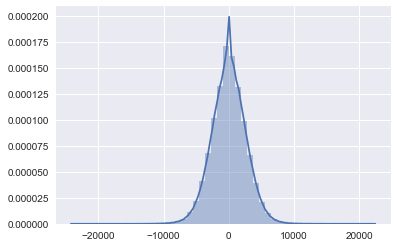

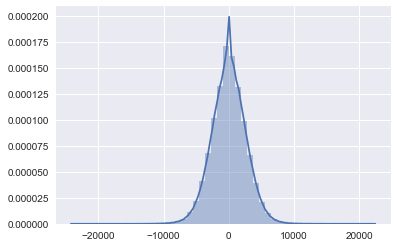

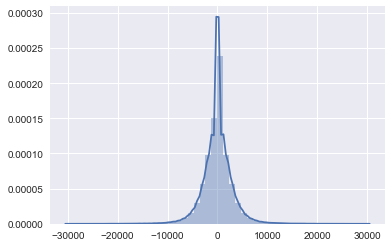

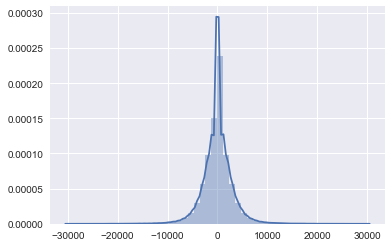

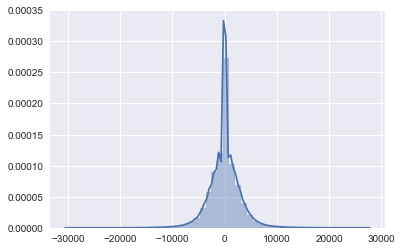

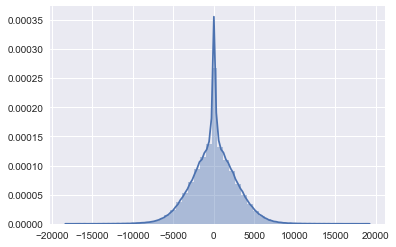

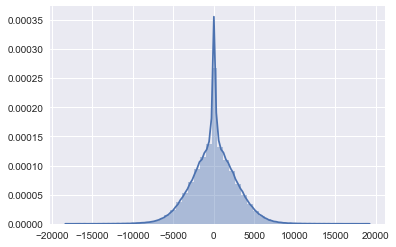

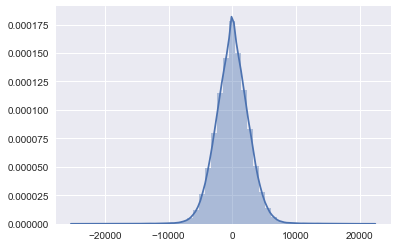

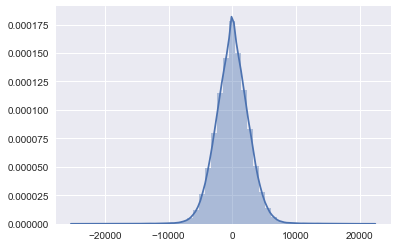

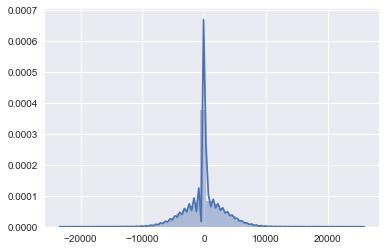

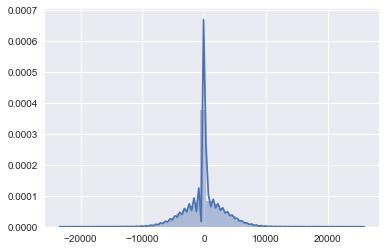

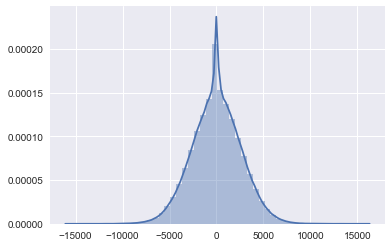

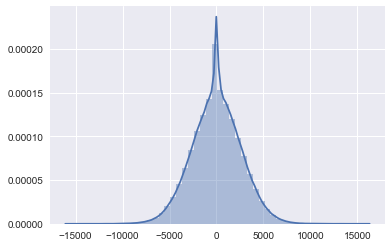

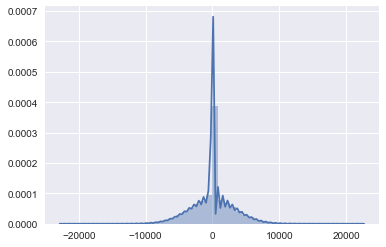

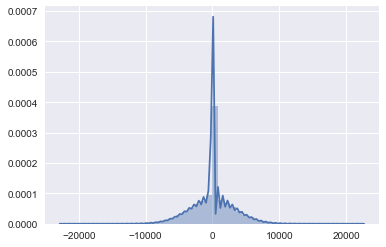

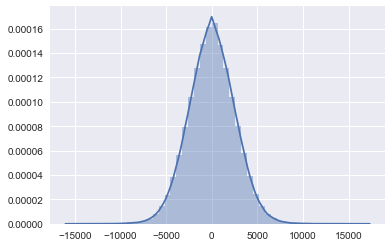

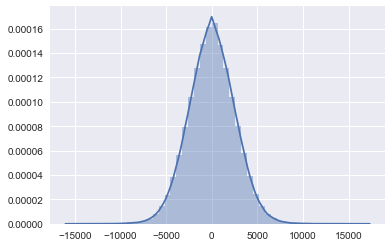

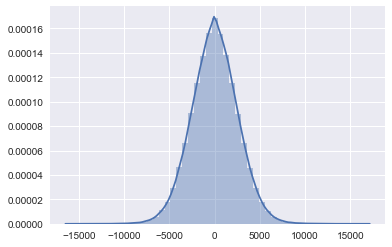

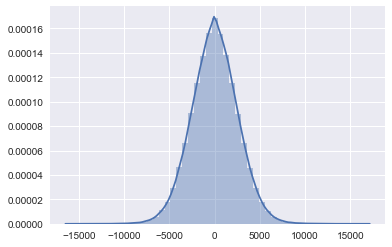

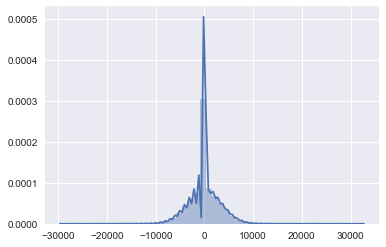

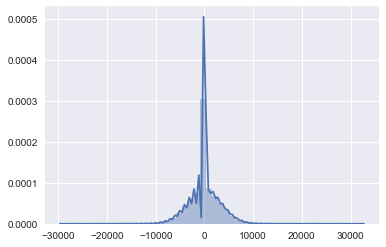

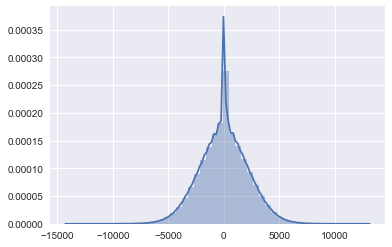

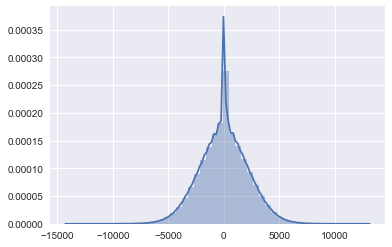

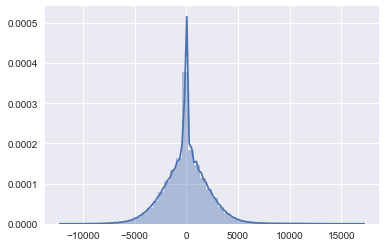

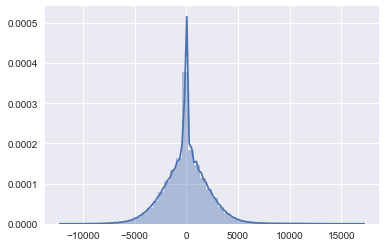

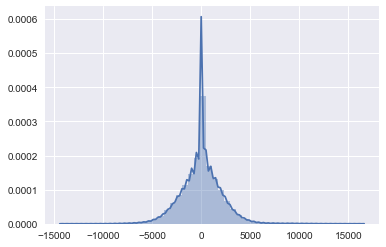

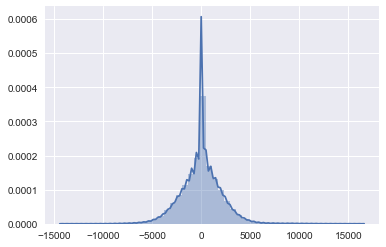

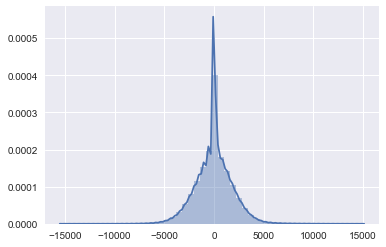

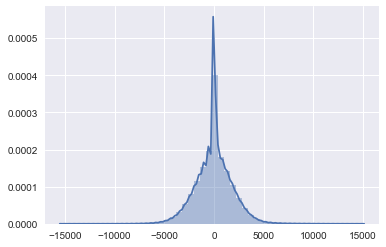

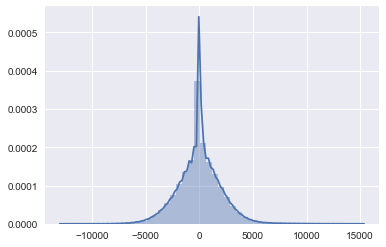

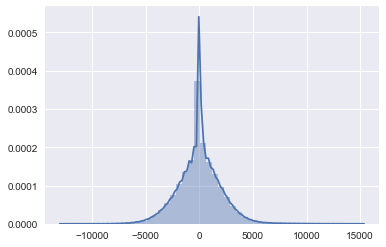

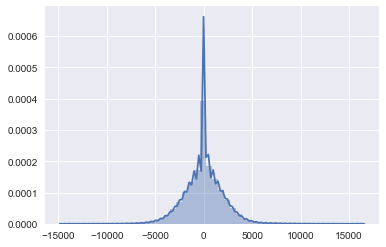

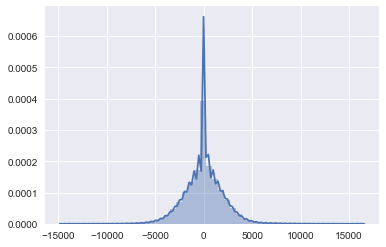

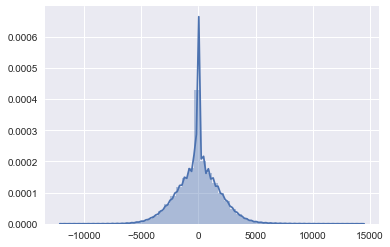

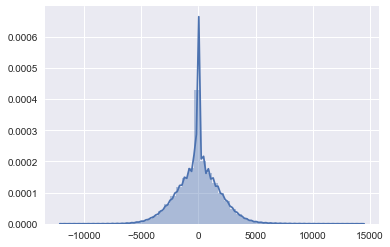

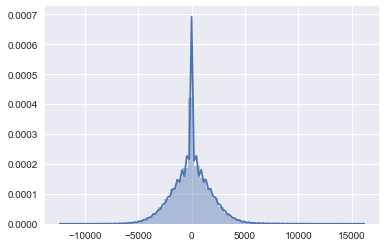

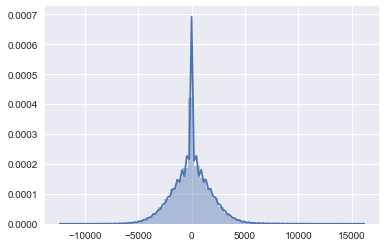

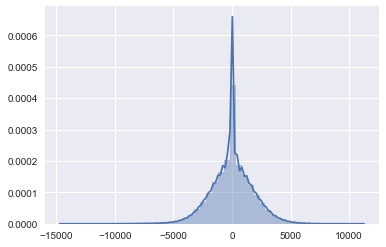

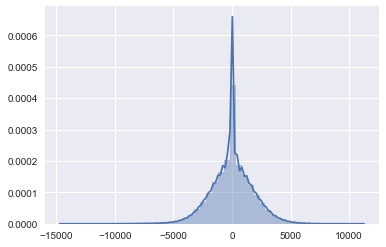

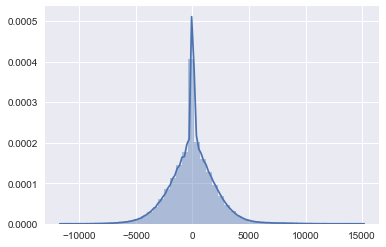

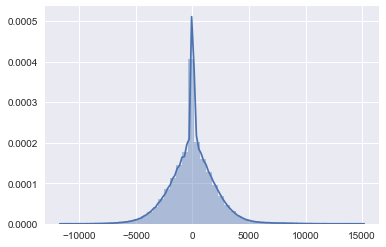

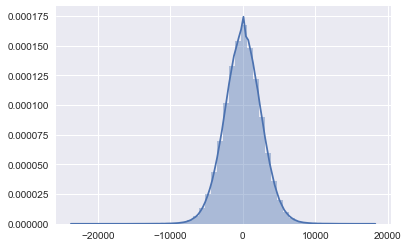

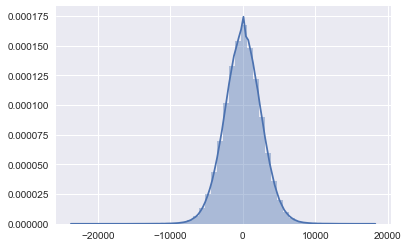

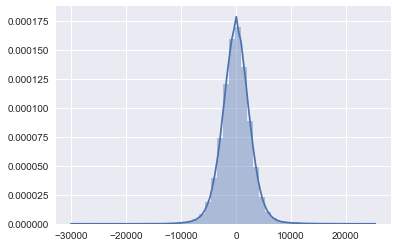

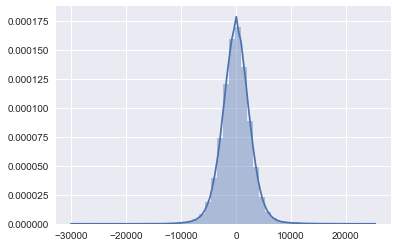

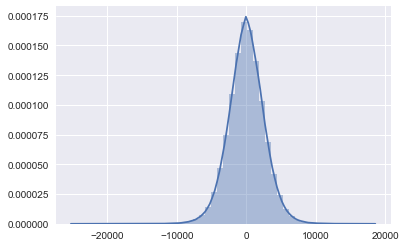

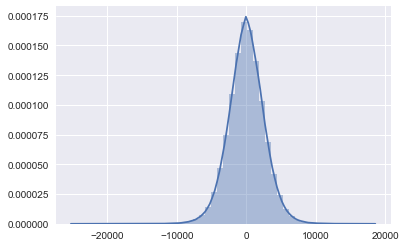

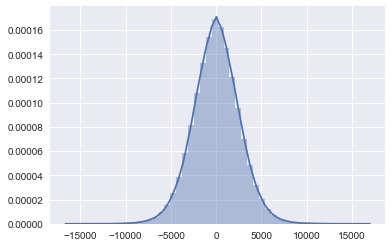

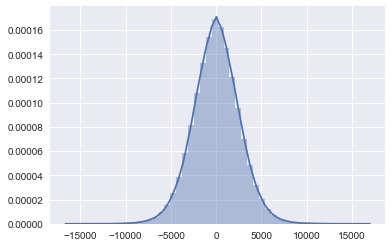

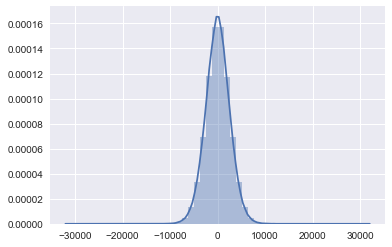

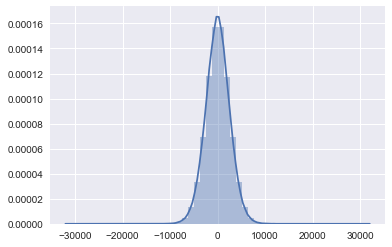

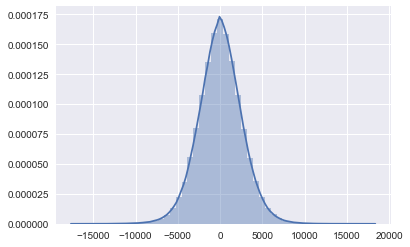

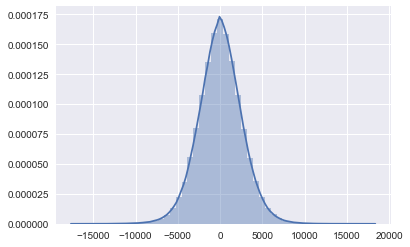

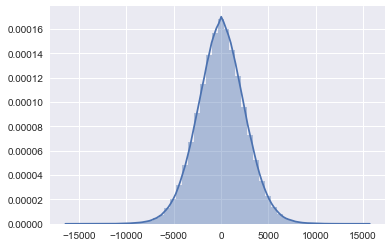

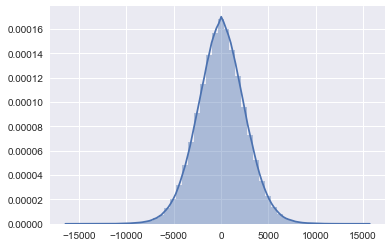

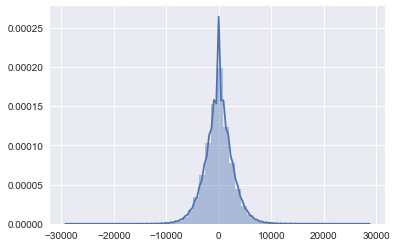

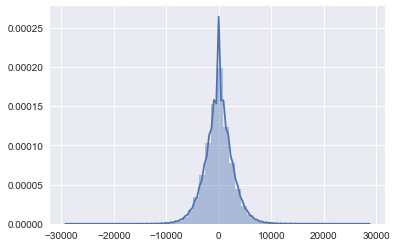

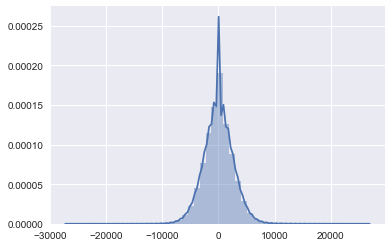

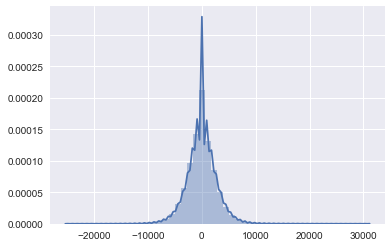

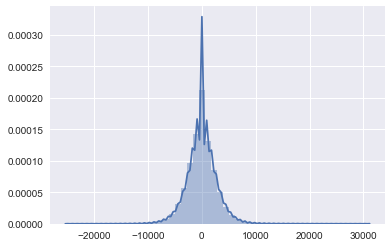

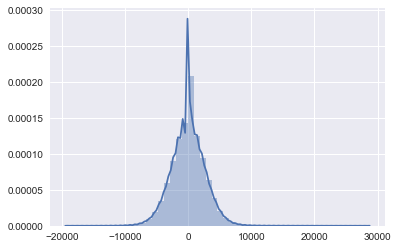

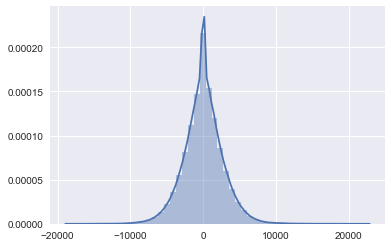

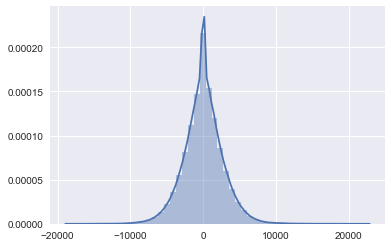

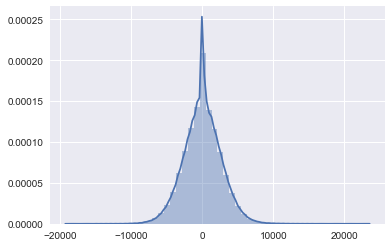

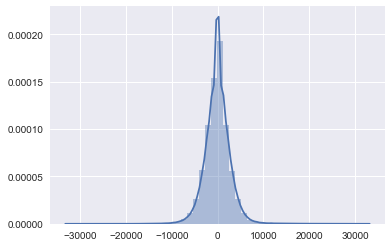

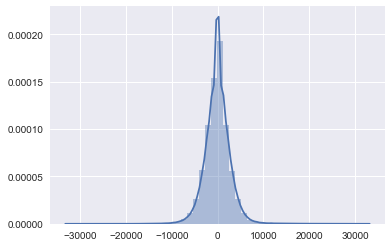

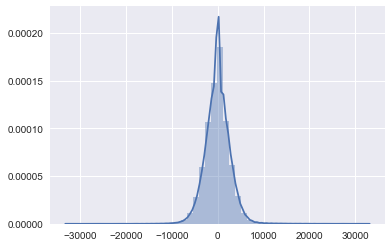

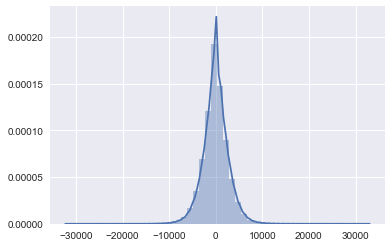

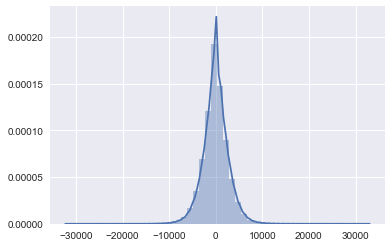

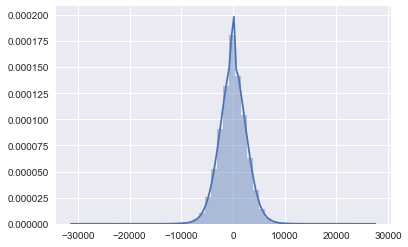

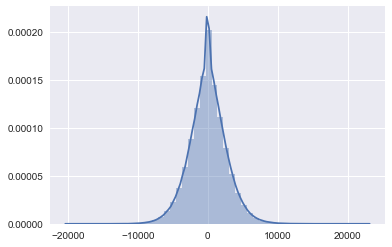

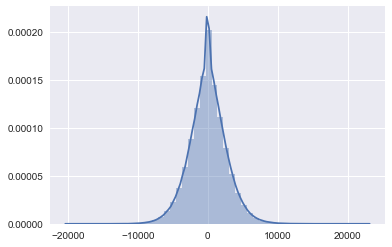

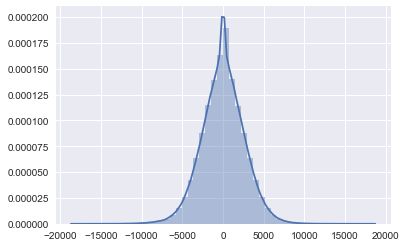

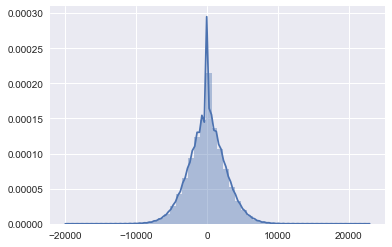

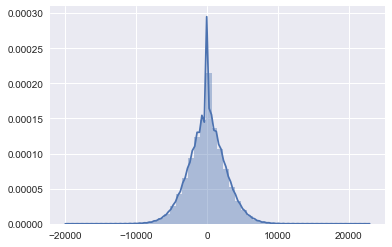

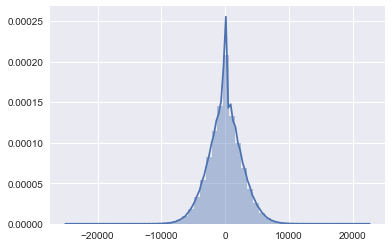

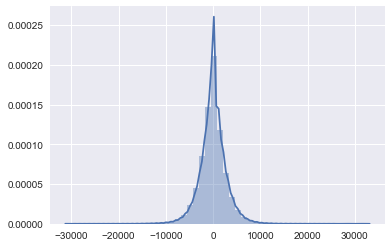

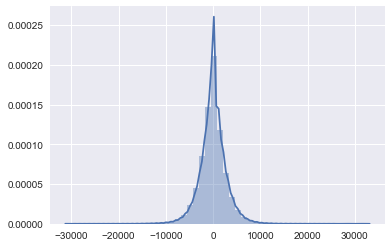

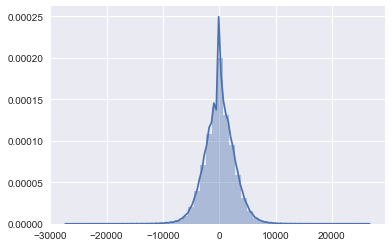

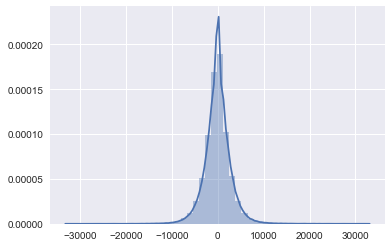

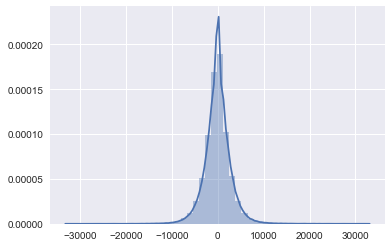

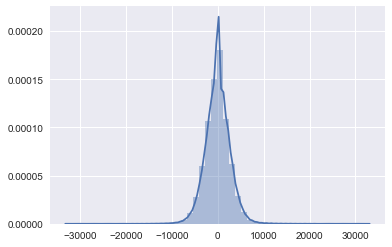

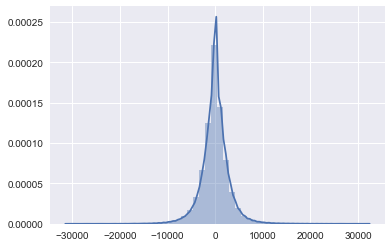

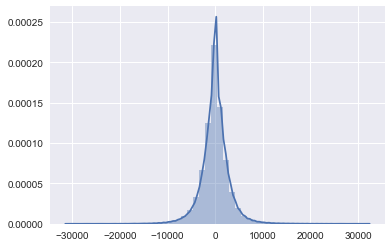

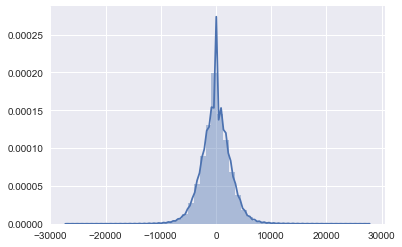

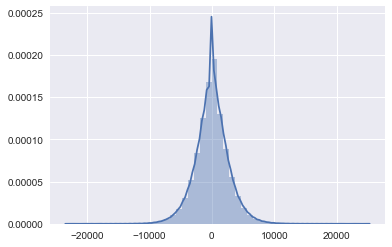

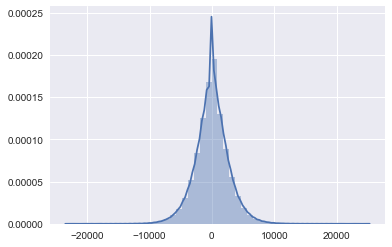

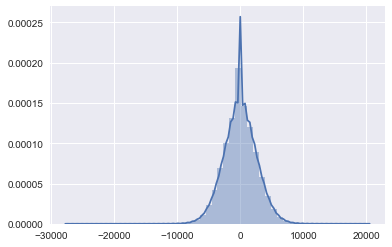

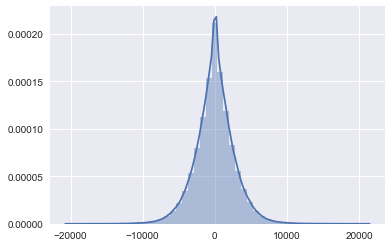

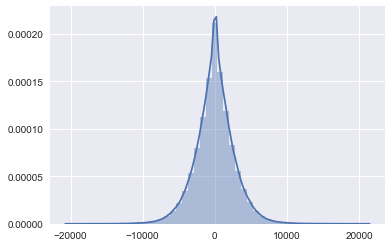

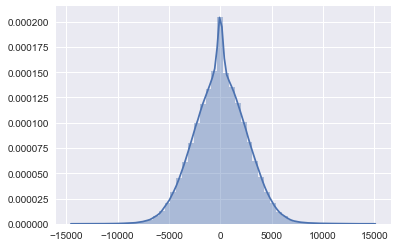

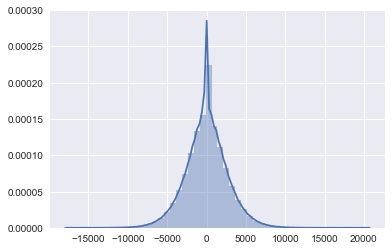

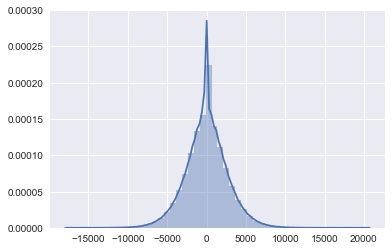

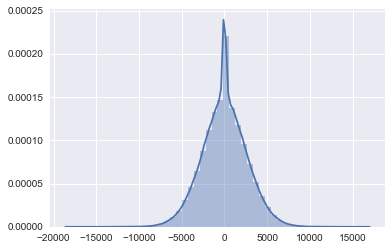

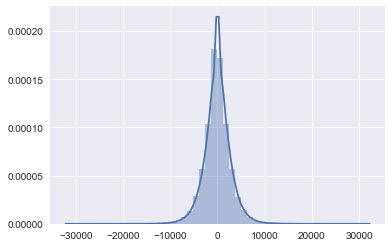

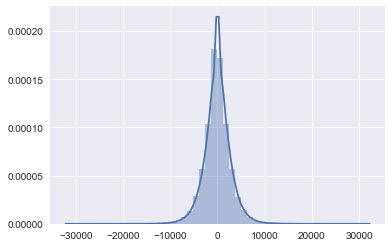

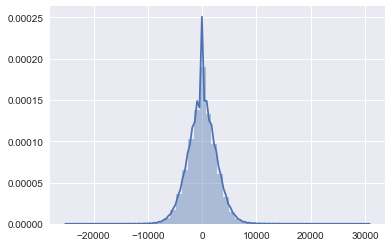

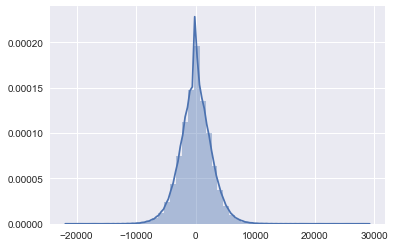

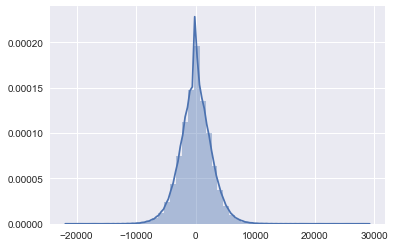

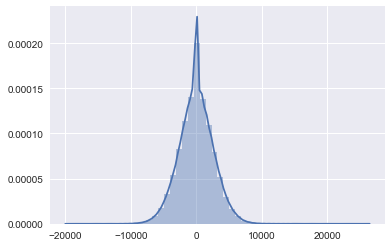

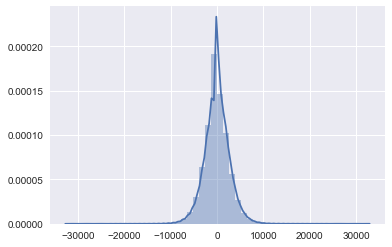

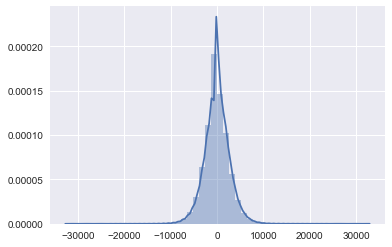

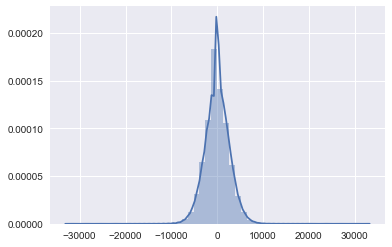

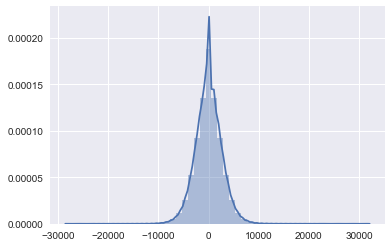

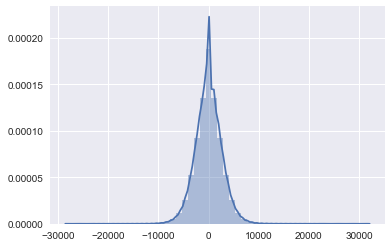

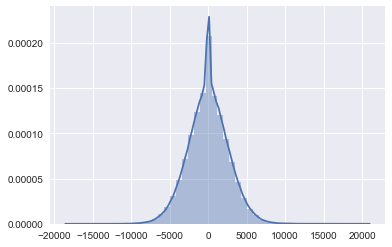

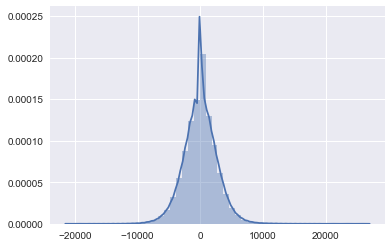

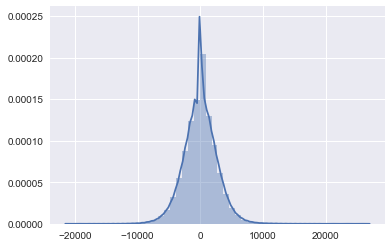

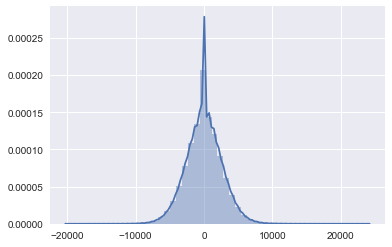

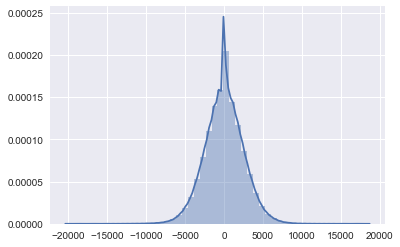

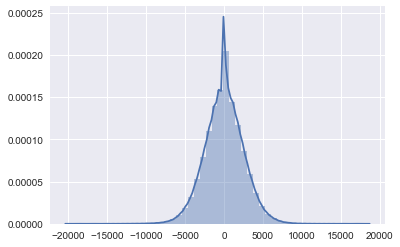

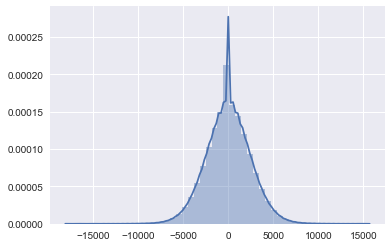

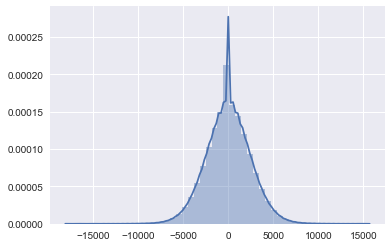

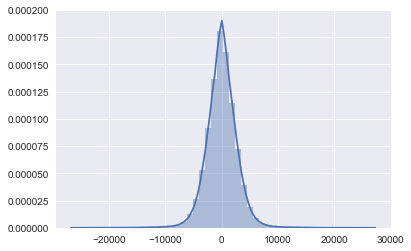

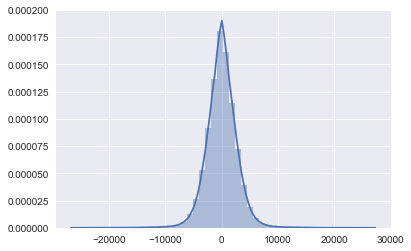

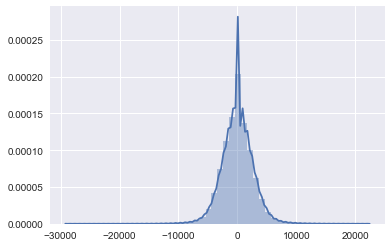

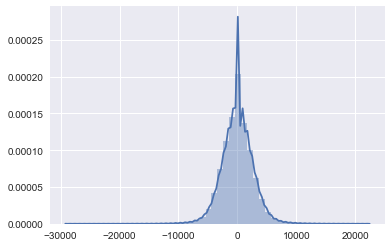

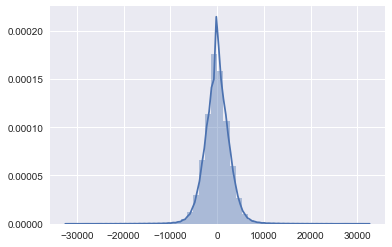

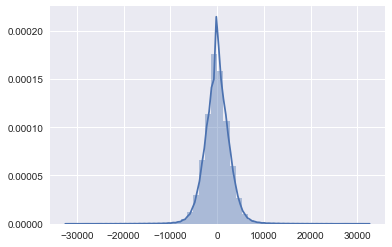

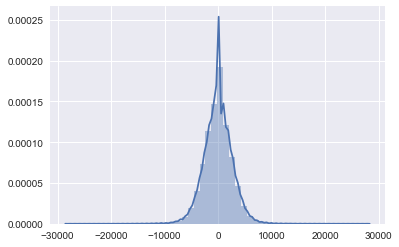

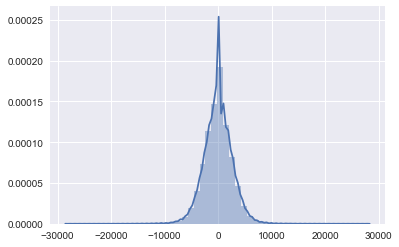

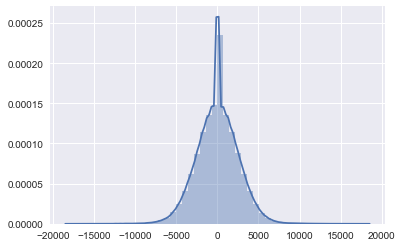

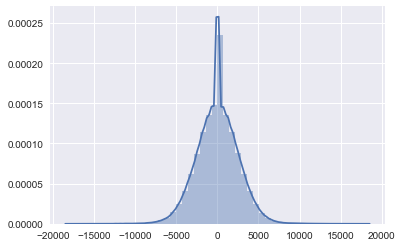

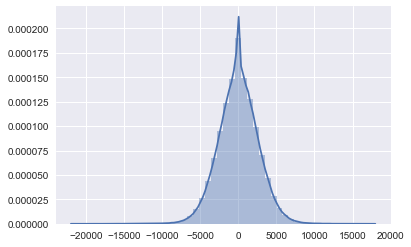

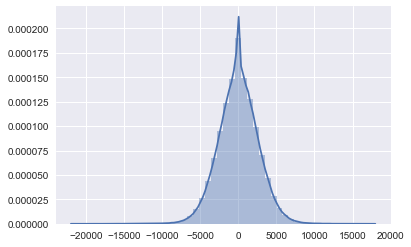

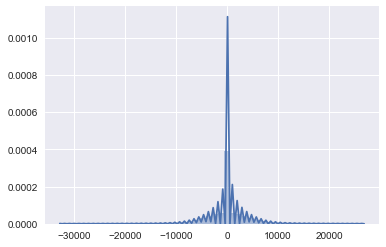

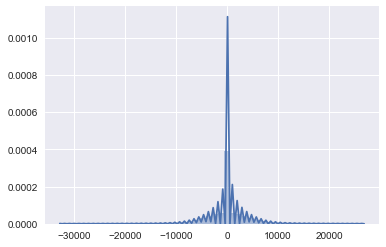

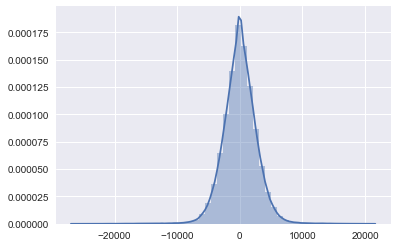

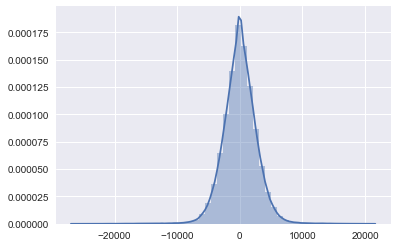

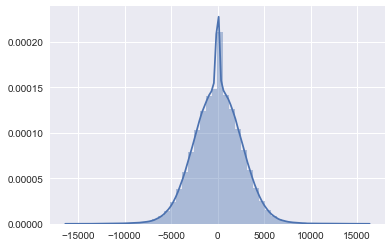

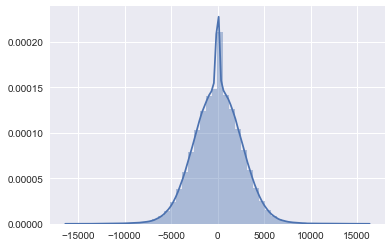

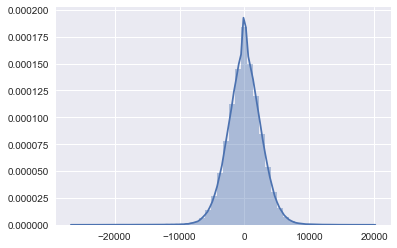

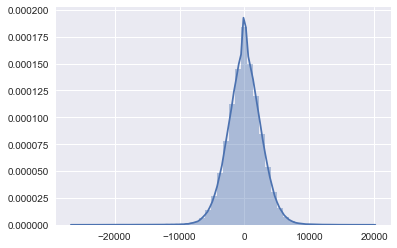

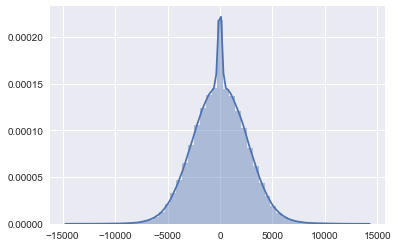

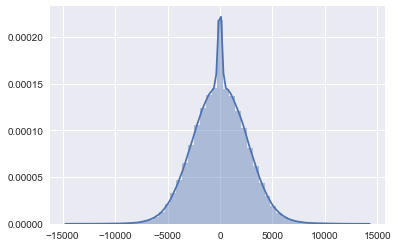

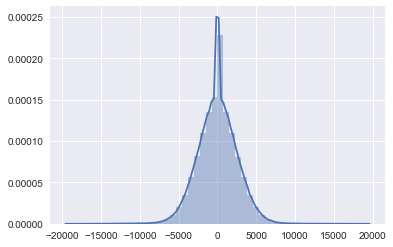

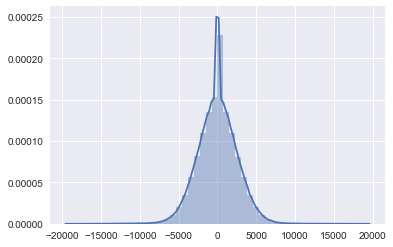

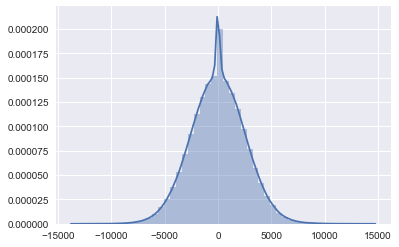

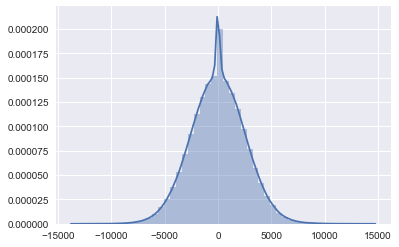

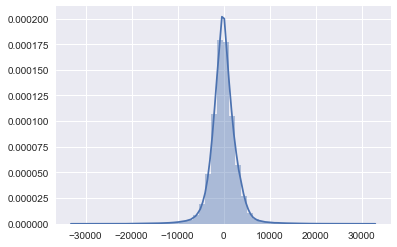

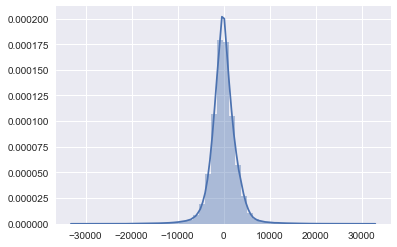

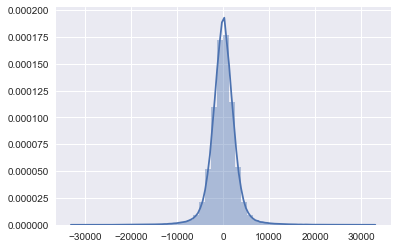

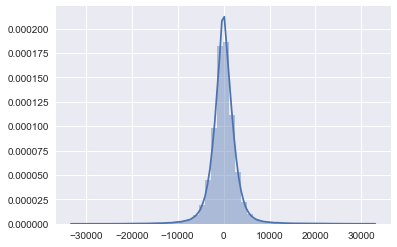

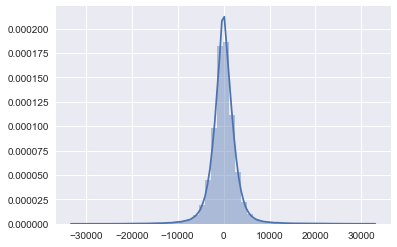

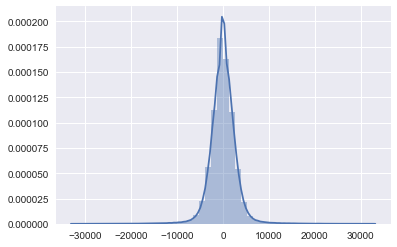

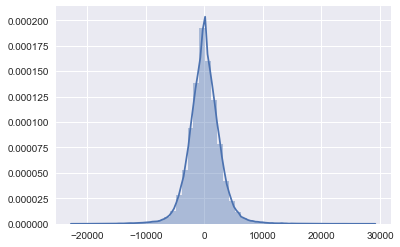

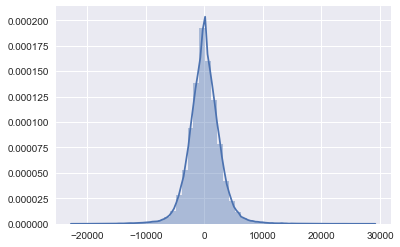

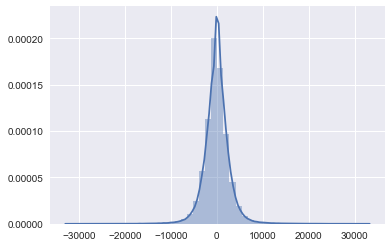

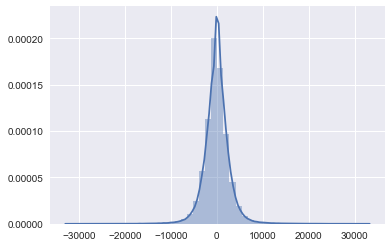

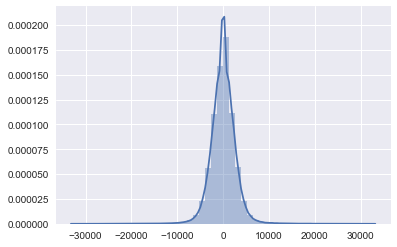

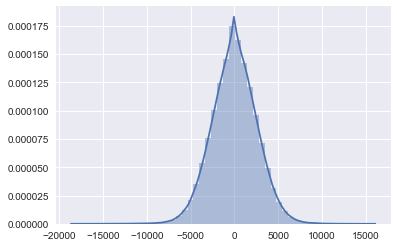

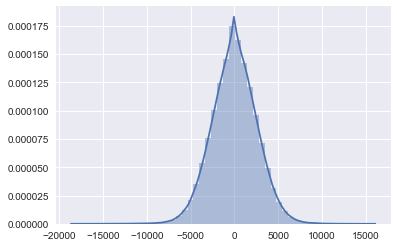

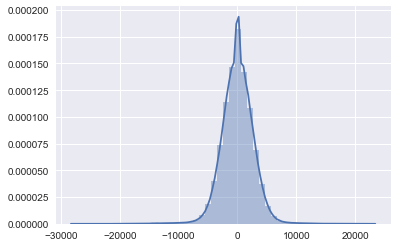

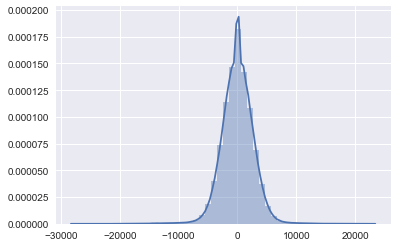

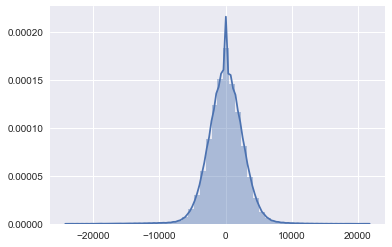

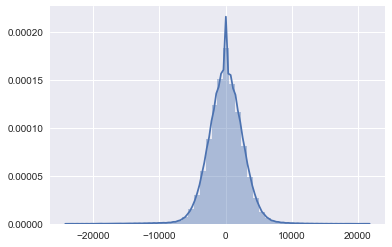

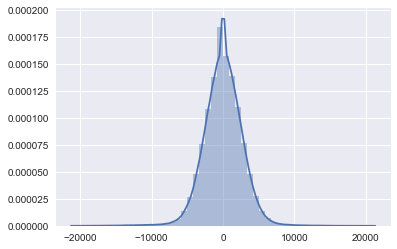

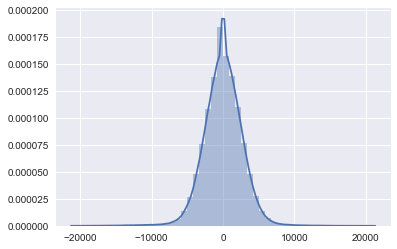

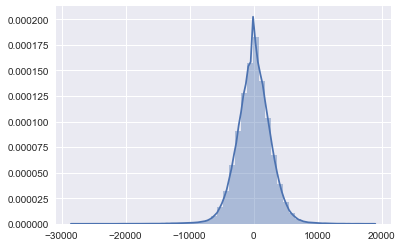

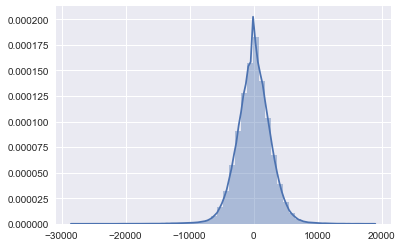

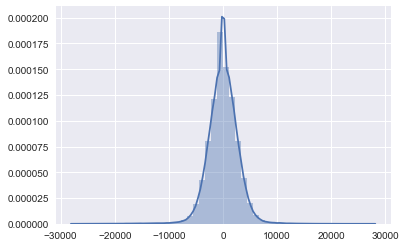

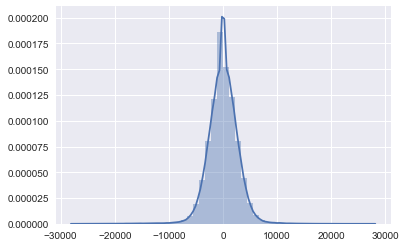

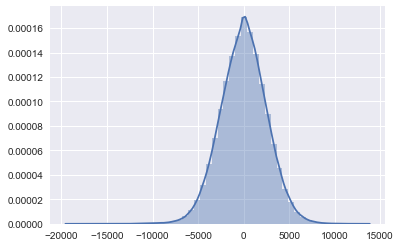

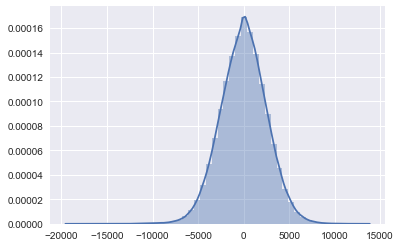

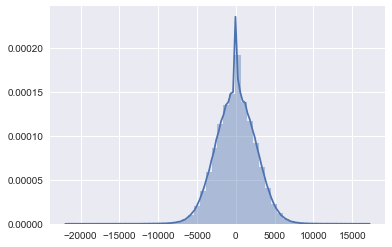

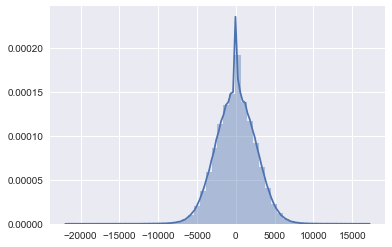

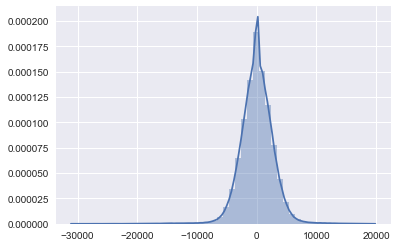

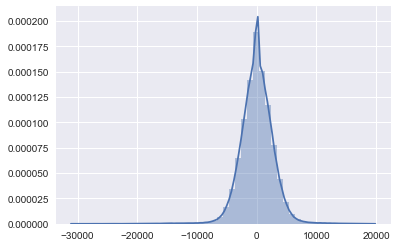

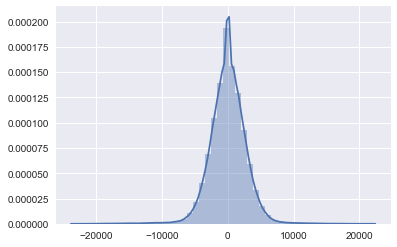

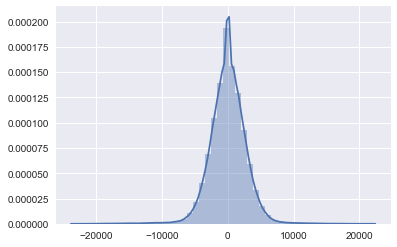

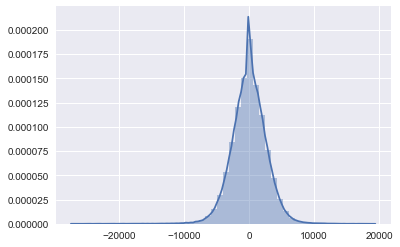

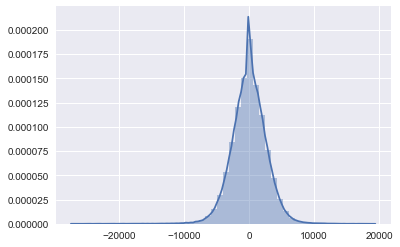

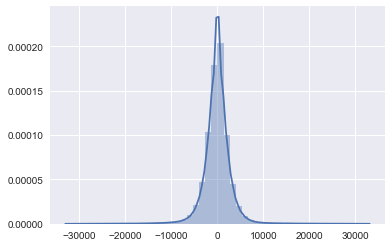

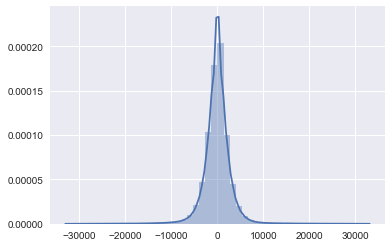

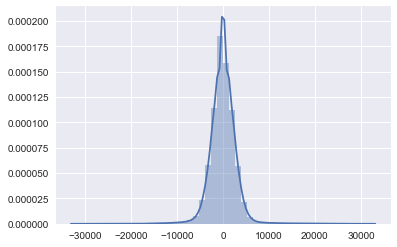

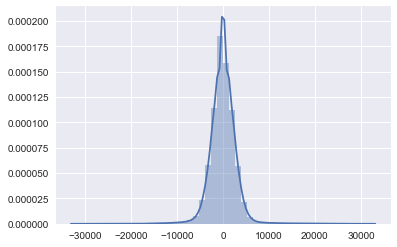

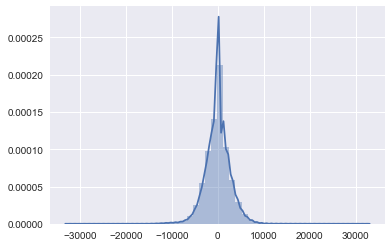

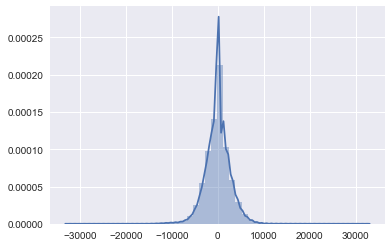

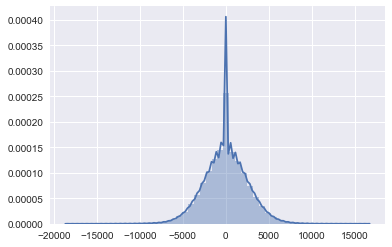

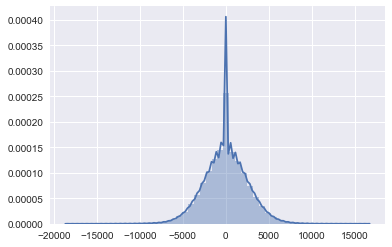

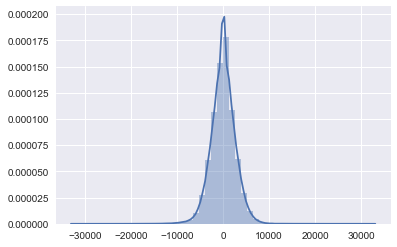

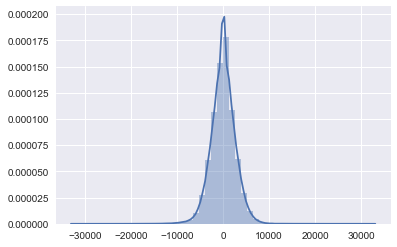

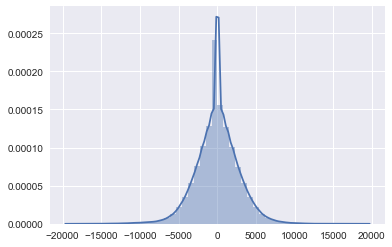

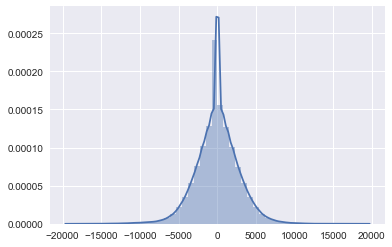

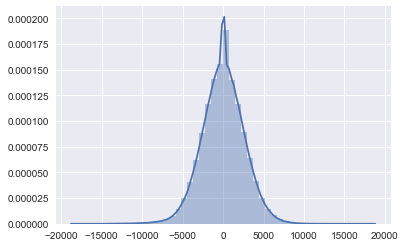

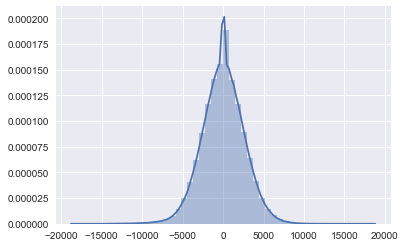

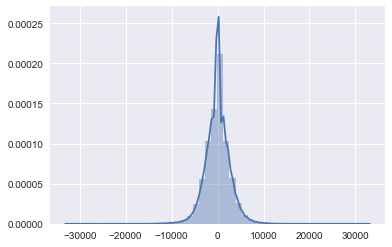

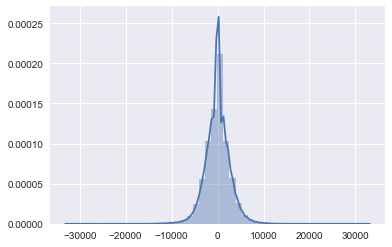

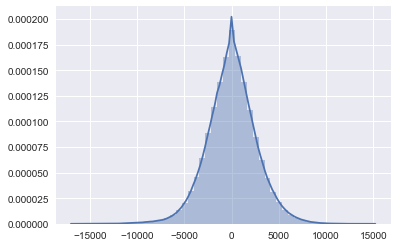

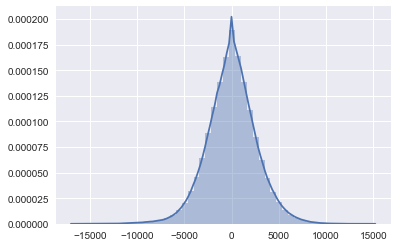

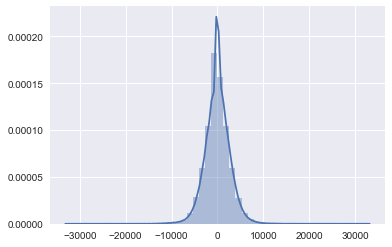

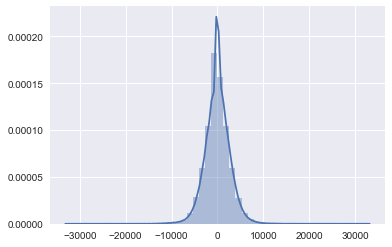

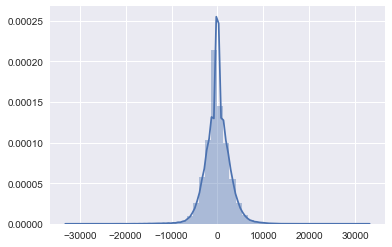

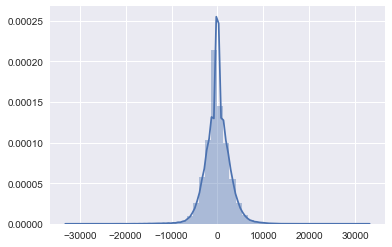

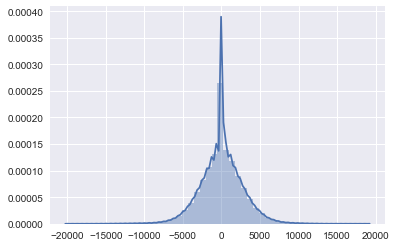

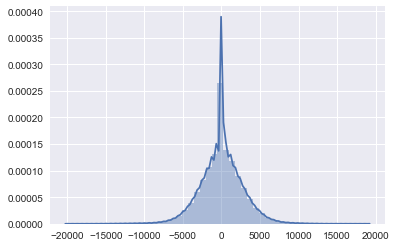

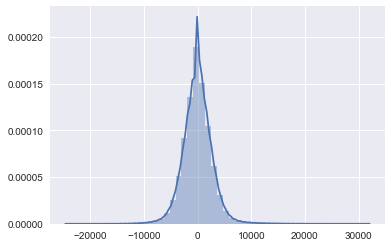

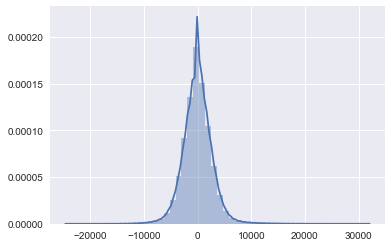

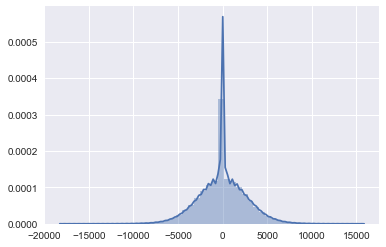

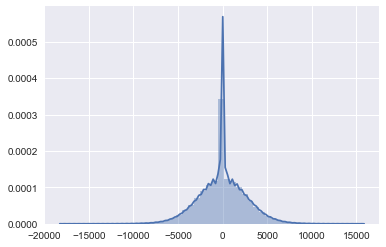

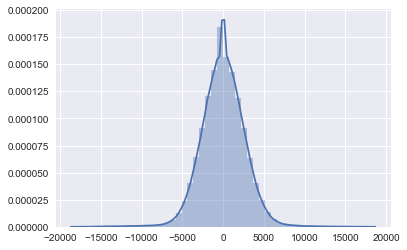

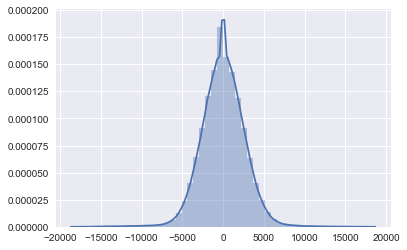

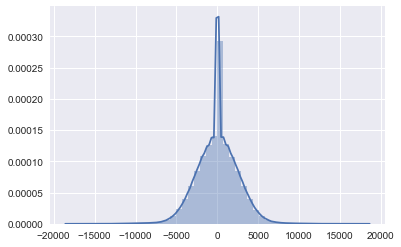

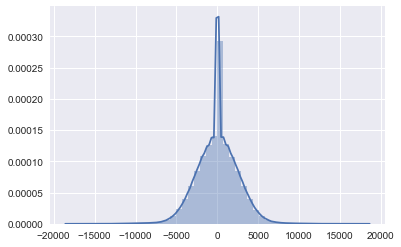

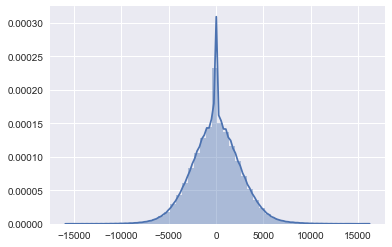

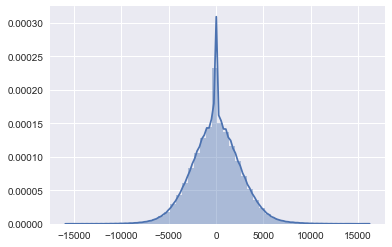

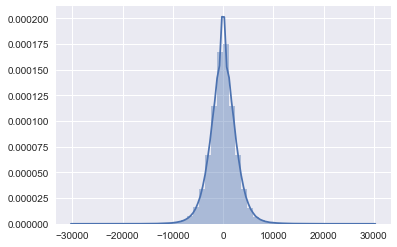

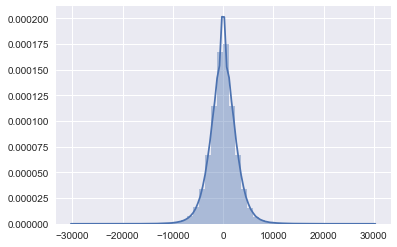

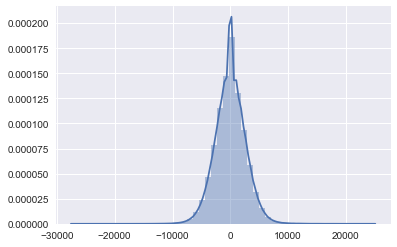

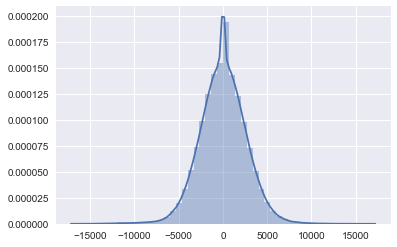

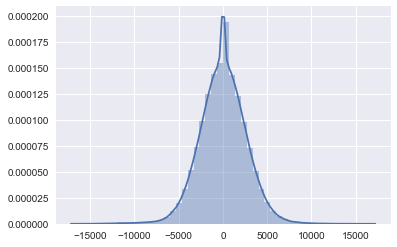

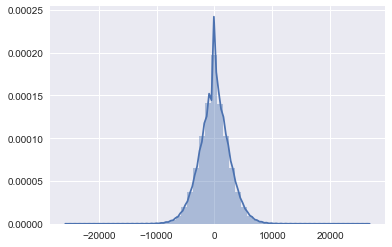

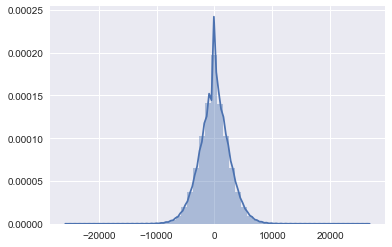

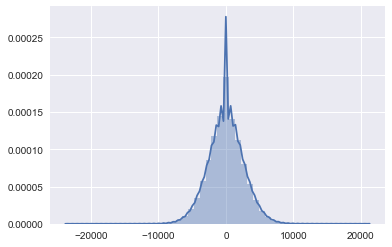

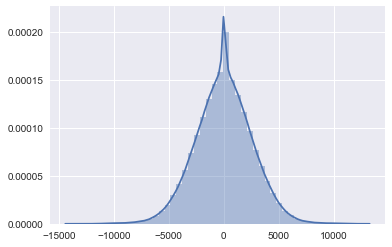

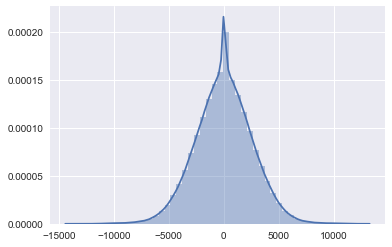

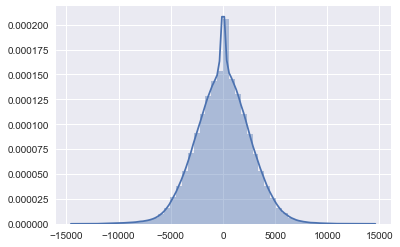

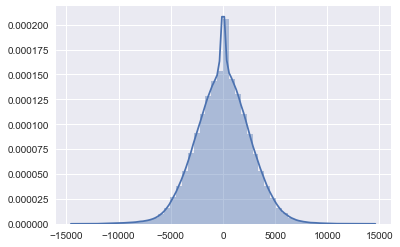

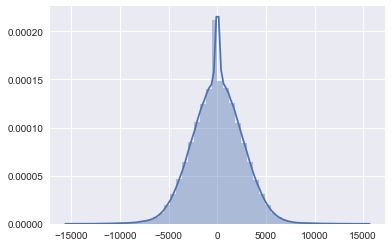

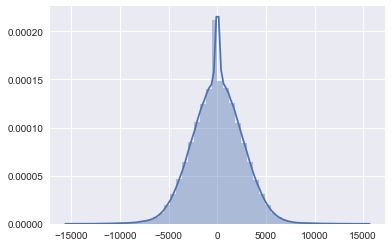

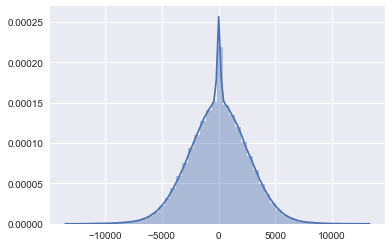

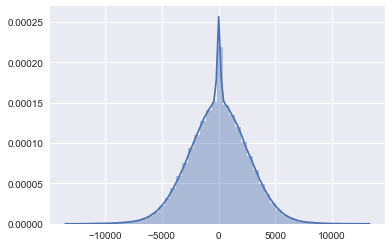

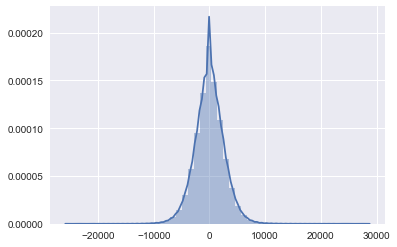

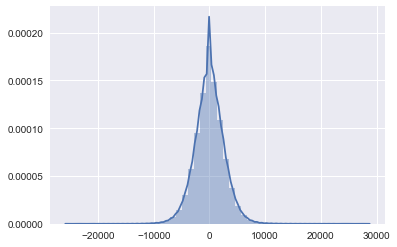

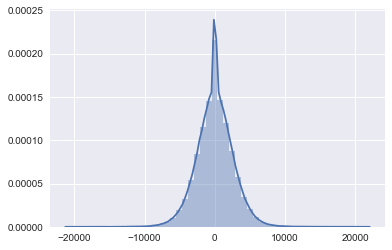

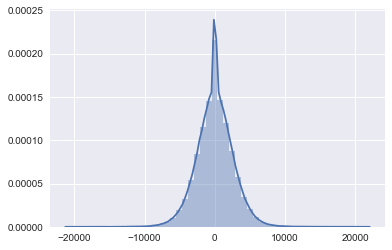

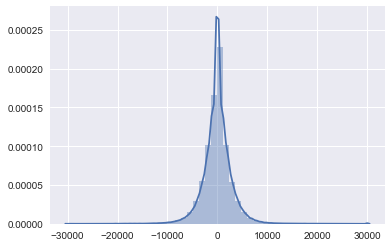

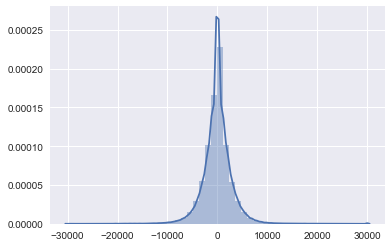

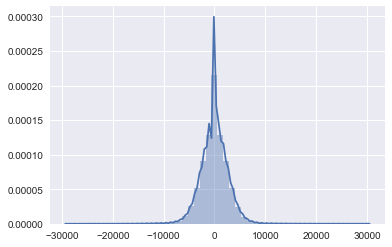

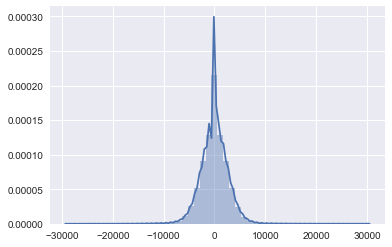

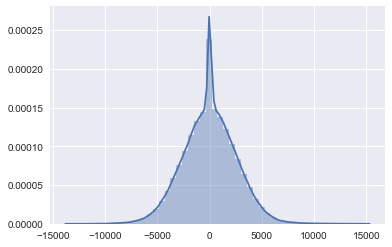

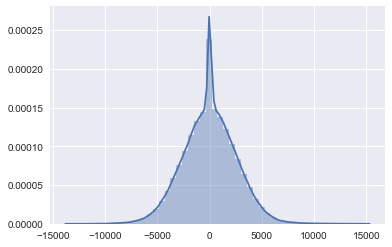

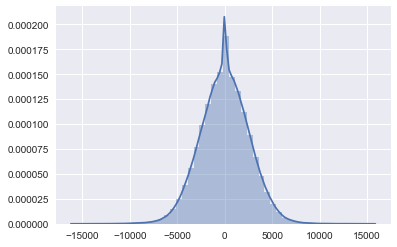

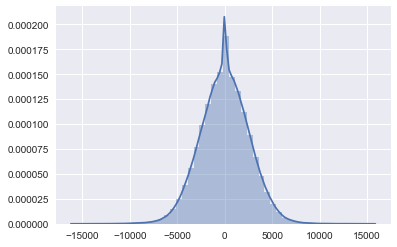

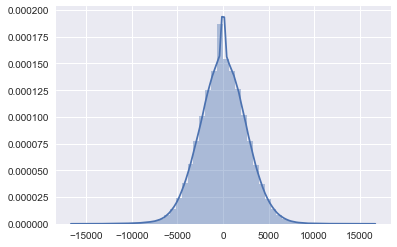

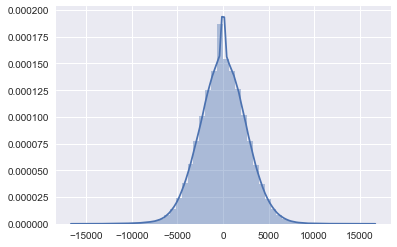

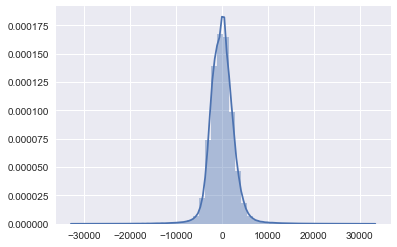

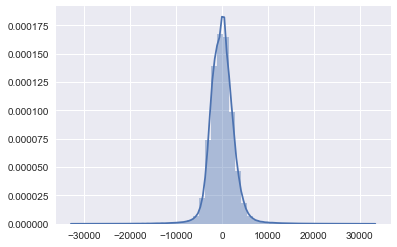

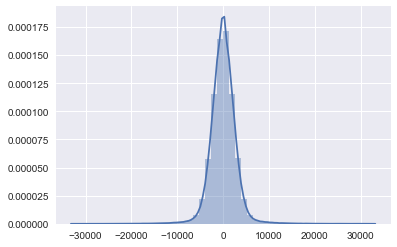

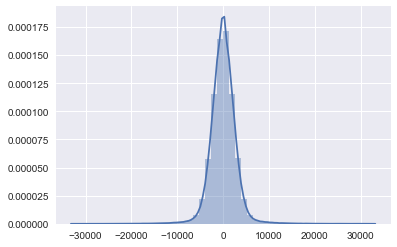

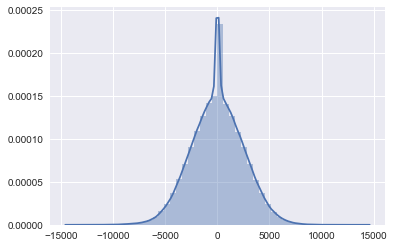

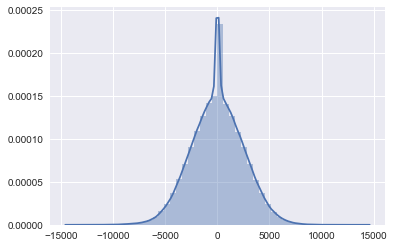

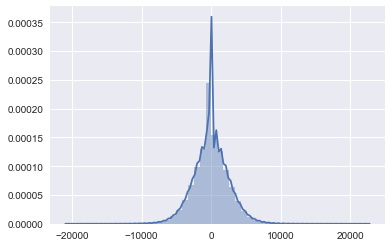

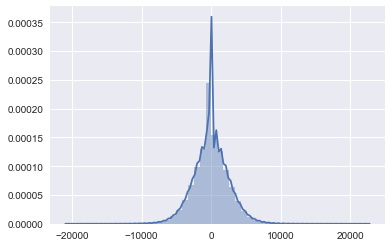

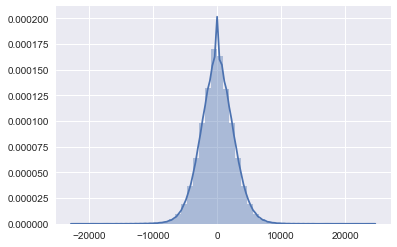

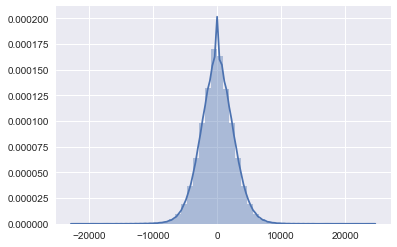

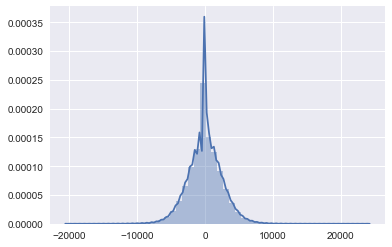

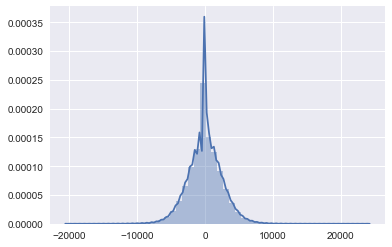

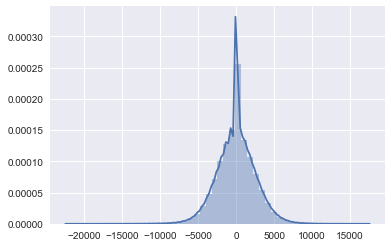

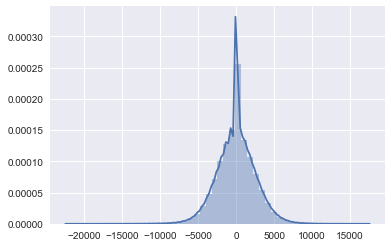

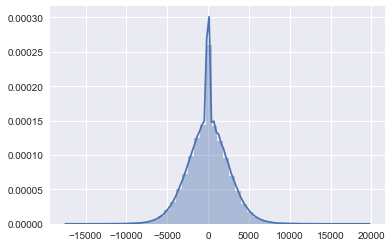

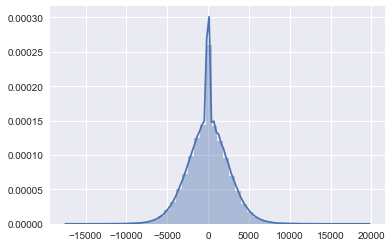

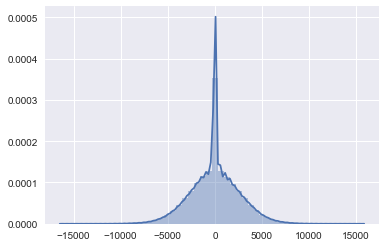

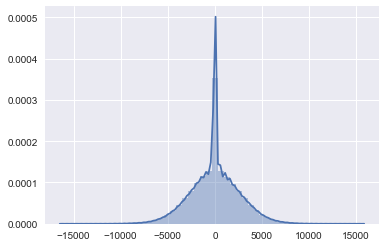

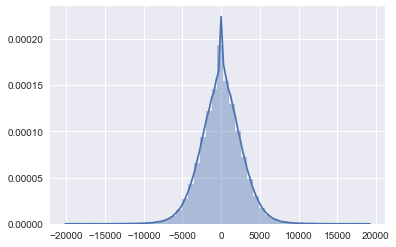

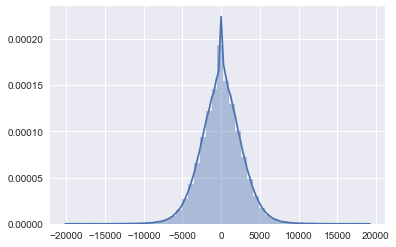

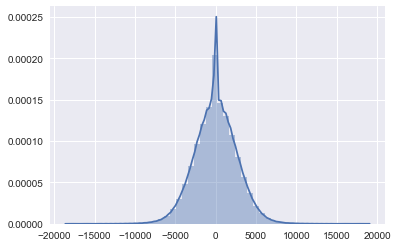

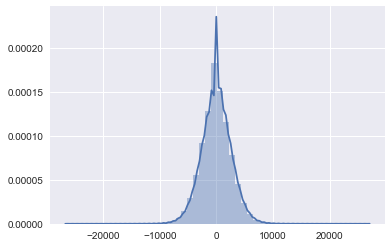

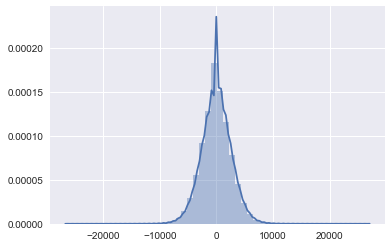

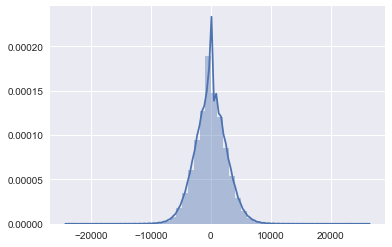

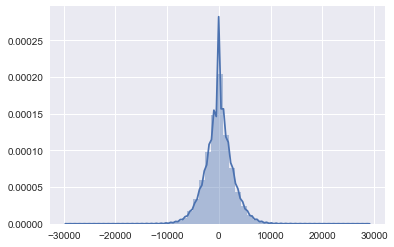

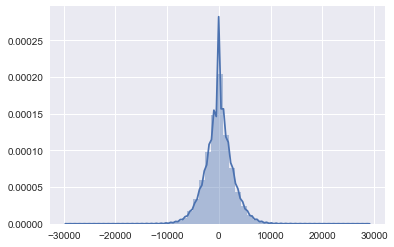

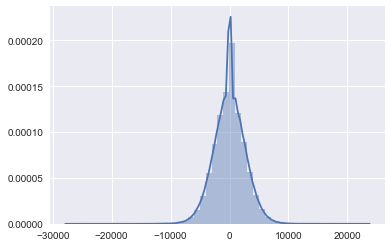

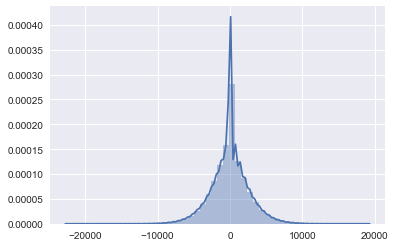

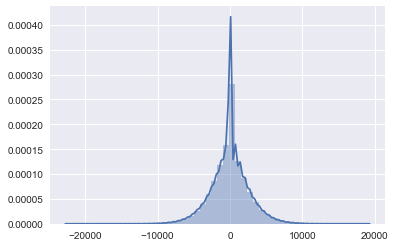

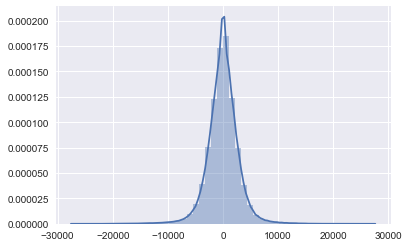

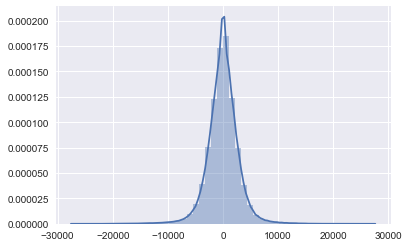

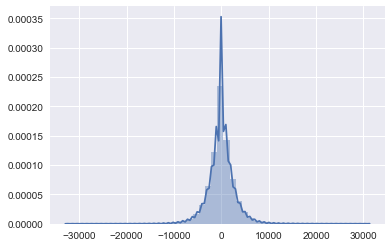

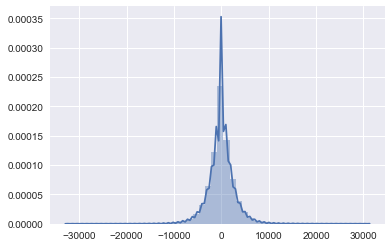

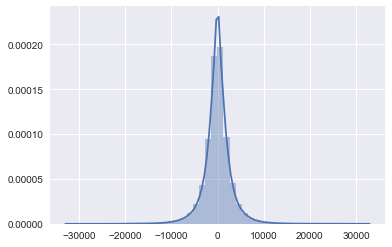

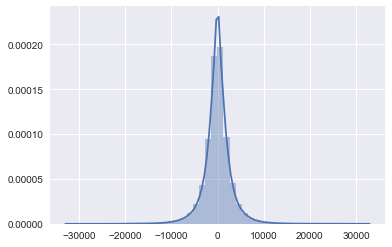

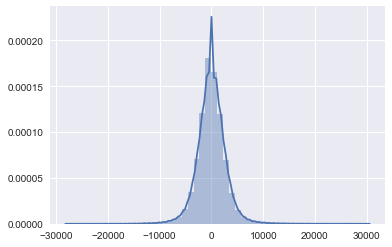

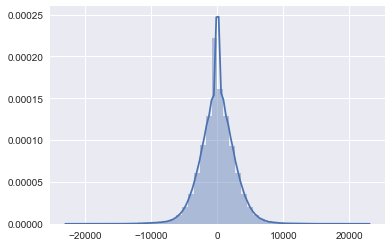

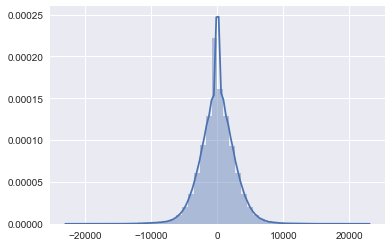

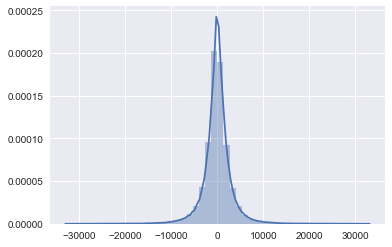

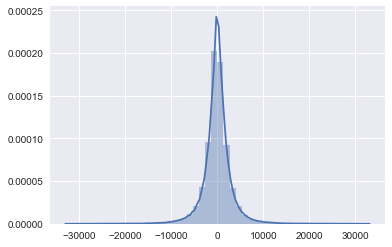

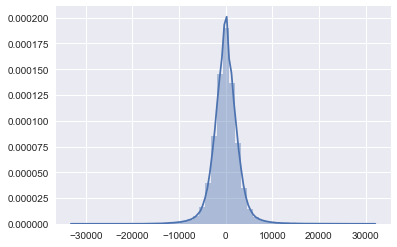

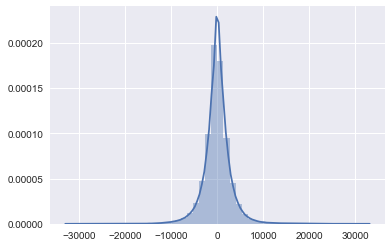

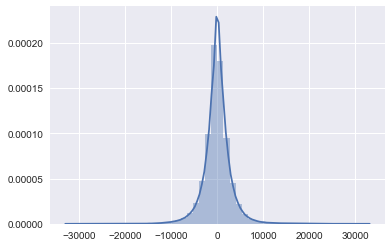

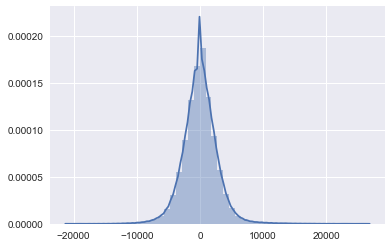

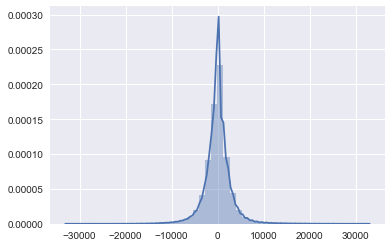

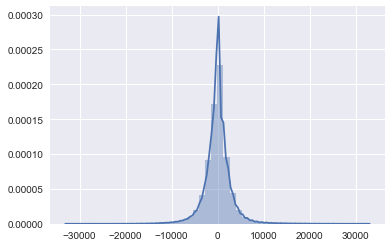

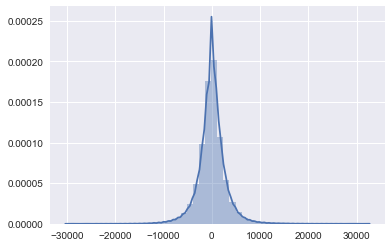

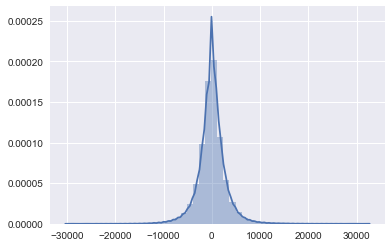

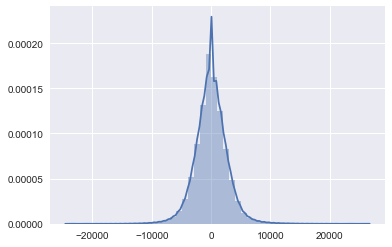

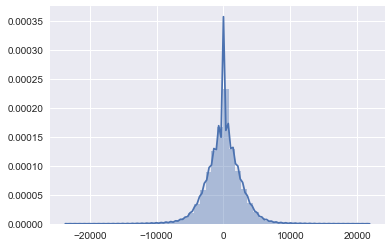

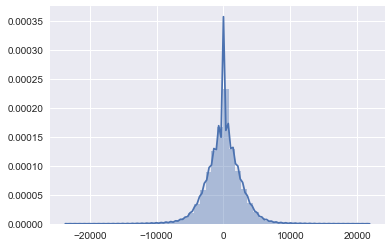

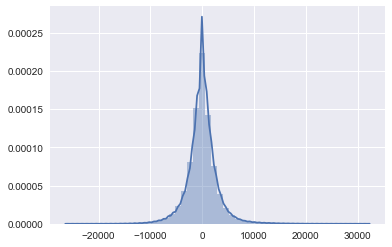

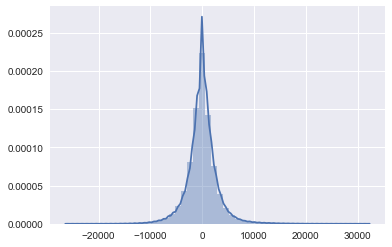

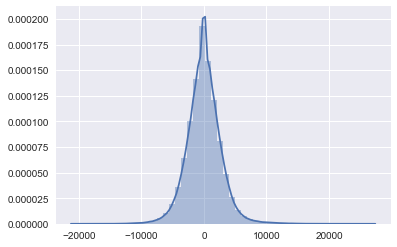

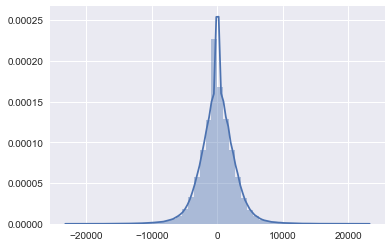

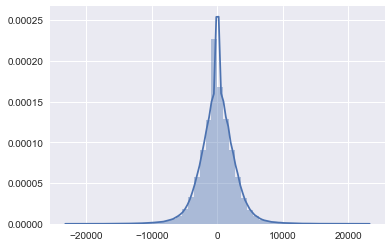

In [16]:
% time 
files = glob(inputpath+'\\*'+sgy_suffix)

n = 0
for file in files:
    print('file %s %d'%(file, n))
    n += 1
    try:        
        segy = _read_segy(file, unpack_trace_headers=True)
    except:
        print('error on file')
        continue    
    img = np.array([tr.data for tr in segy]) # samples x traces
    img = img - np.mean(img) # remove the mean or DC
    perc = [0.5,1,10,50,90,99,99.5]  
    values = np.percentile(img.ravel(), perc)
    plt.figure()
    sns.distplot(img.ravel());    
    print(perc,values)    
    # clip by the low 1% and up 1%
    # use scale factor for integer of 16 or 32
    img = img.clip(values[1],-values[1])/-values[1] * scale_factor   
    
    if outsample_format == 32:
        img = img.astype(np.int32)
        encoding=2
    elif outsample_format == 16:
        img = img.astype(np.int16)
        encoding=3
    elif outsample_format == '32fieee':        
        img = img.astype(np.float32)
        encoding=5
        
    for i, tr in enumerate(segy):
        tr.data = img[i,:]
    # be carefull bellow you may need to change the extension    
    segy.write(str.format(outpath+'\\%s.sgy'%file.split(sgy_suffix)[0].split('\\')[-1]), 
               data_encoding=encoding, format='SEGY')
    
    del segy

file =r'F:\2017 ANP\Dados Potiguar\0043x\0043_POTIGUAR_39.0043-0039.MIG_FIN.12.sgy'
segy = _read_segy(file, unpack_trace_headers=True)
img = np.array([tr.data for tr in segy]) # samples x traces
values = np.percentile(img.ravel(), perc)
print(perc,values)  
plt.figure()
sns.distplot(img.ravel());    